# **Projet Python et statistiques Machine Learning**
**Ouarma *Issouf*** 

*Avec un Binône*



*   **Importation de librairies**




In [1]:
!pip install shap

     |████████████████████████████████| 564 kB 20.0 MB/s 


In [2]:
!pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import shap
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score,  plot_confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import tree

# **Importation des données**

In [4]:
df = pd.read_csv("/content/Absenteeism_at_work.csv", sep =";")

# **I. Analyse exploratoire**

**Objectif :** 
Comprendre nos données.

**Checklist de base :** 

# Analyse de la Forme : 

*   **Variable cible** : Temps d'absence (en heures) 
*   **Lignes et colonnes** : 740, 21
*   **types de variables** : 21 variables

.................. a. catégorielles : 8 .............................. 

     Reason for absence : une des 28 raisons                
     Month of absence : Mois d'absence                 
     Day of the week  : Jour de la semaine                 
     Seasons          : saisons               
     Disciplinary failure : Faute profesionnelle             
     Education        : Niveau de formation
     Social drinker   : Buveur 
     Social smoker    : Fumeur

....................b. quantitatives : 13 ............................

     ID
     Transportation expense  : Frais de transport          
     Distance from Residence to Work : Distance domicile-travail
     Service time      : Temps de travail                 
     Age               : age                   
     Work load Average/day  : charge de travail moyenne par jour          
     Son                    : Nombre d'enfants           
     Pet                    : Nombre d'animaux de compagnie
     Weight                 : Poids            
     Height                 : Taille 
     Body mass index        : Indice de masse corporelle
     Absenteeism time in hours : Temps d'absence en heures 
     Hit target             : objectif réalisé

* **Analyse des valeurs manquantes :** Il n'y a aucune valeur manquante.




In [5]:
df.info() # Affiche les informations du dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

 **Dimension de la Base de données** 

In [6]:
df.shape 

(740, 21)

Notre base de données est composé de 740 lignes et 21 colonnes.

**Types des variables**

In [7]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [8]:
df.dtypes.value_counts()

int64      20
float64     1
dtype: int64

Parmi les 21 variables, 20 sont des variables de type entier(int64) et une seule est de type réel(float64)

**Données manquantes**

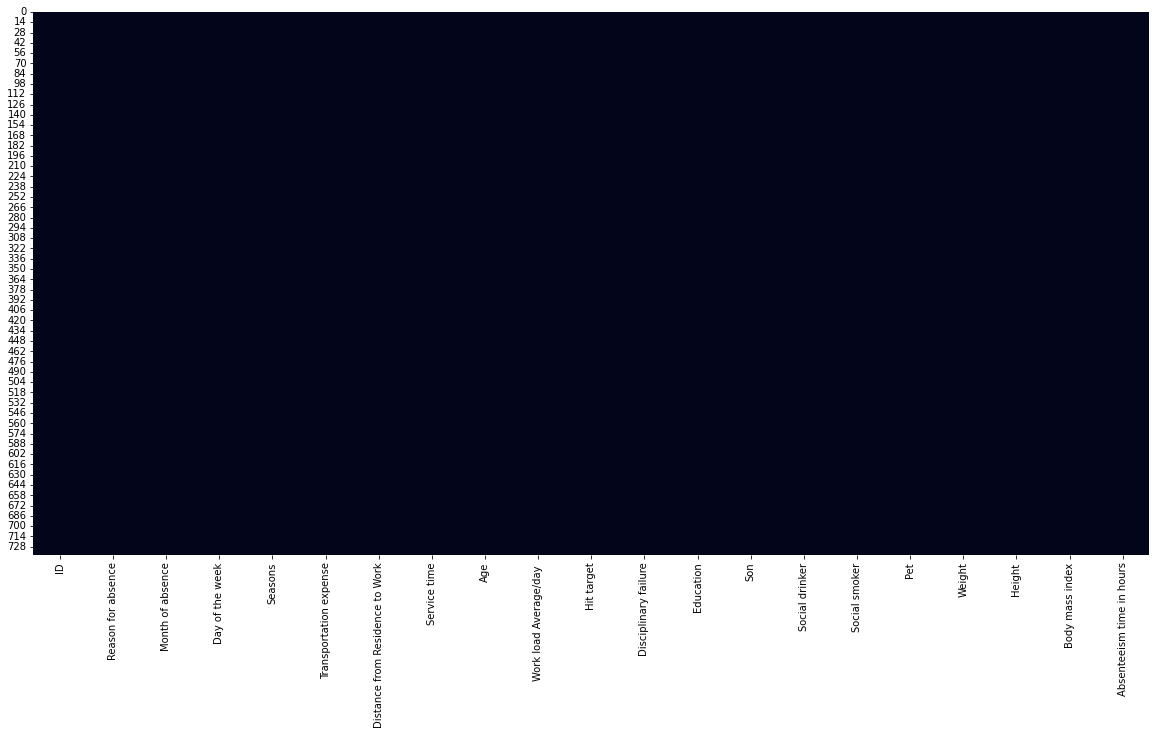

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False) 


*On constate qu'il n'y aucune valeur manquante (Noir = valeurs présentes, blanc = valeurs maquantes) *

**Vue globale de la répartition des données par variable**

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

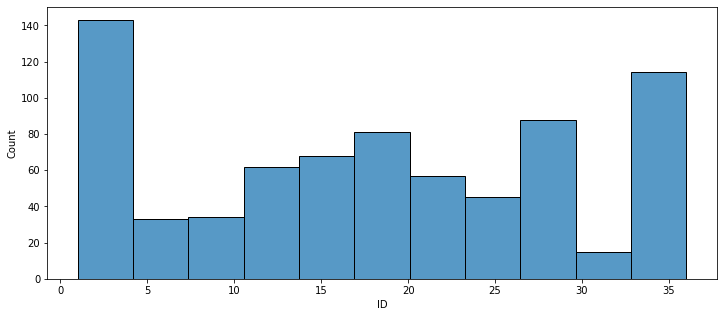

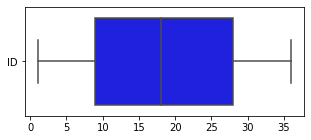

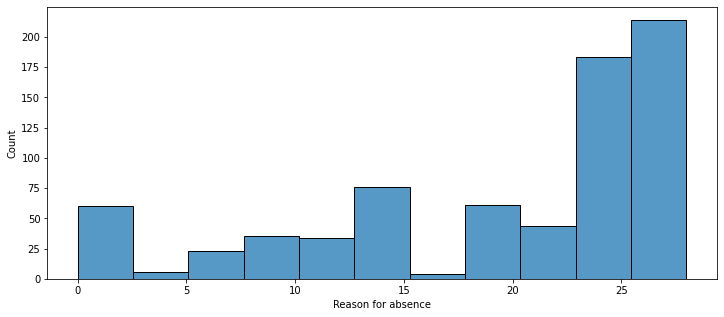

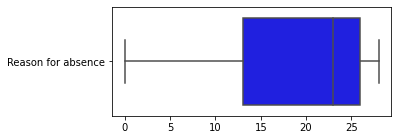

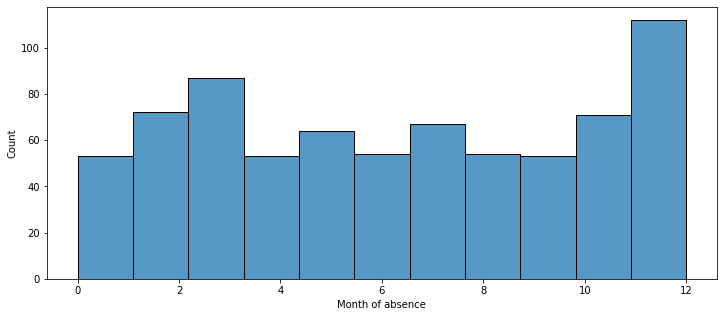

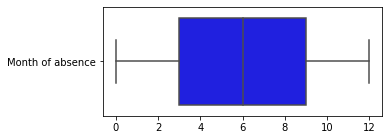

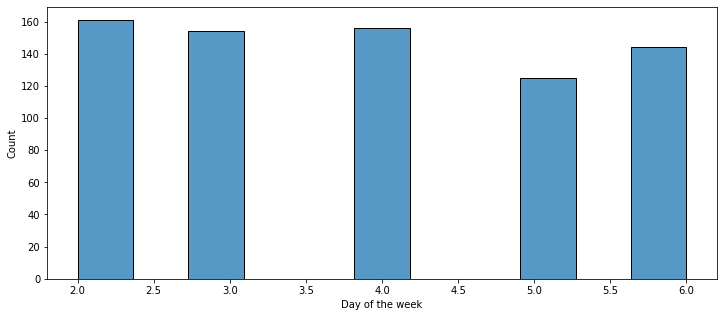

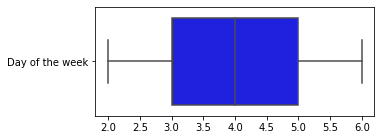

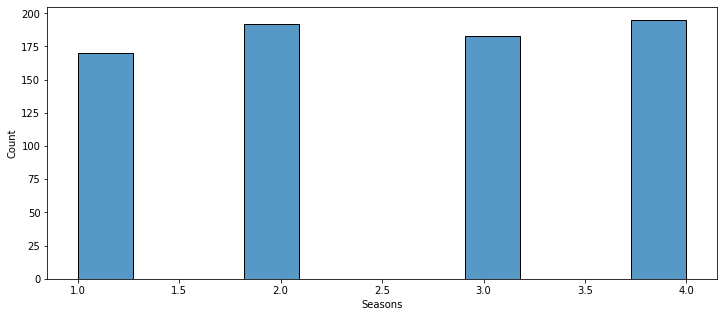

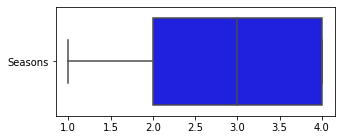

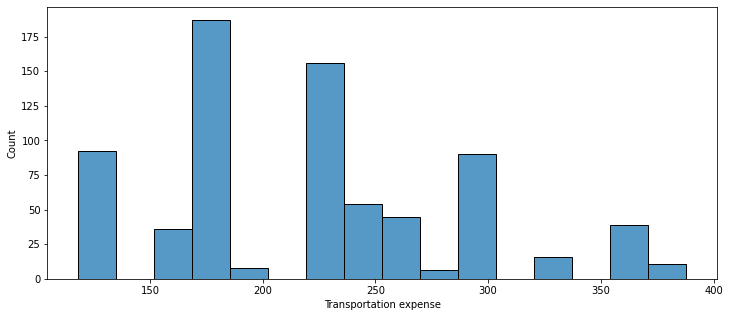

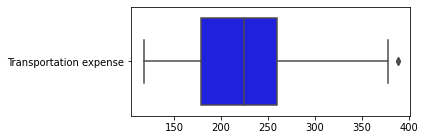

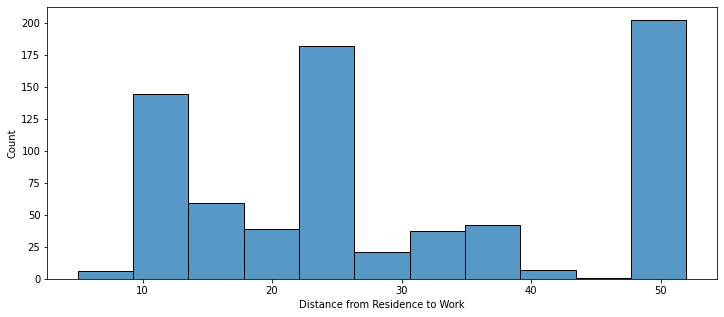

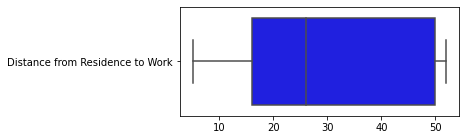

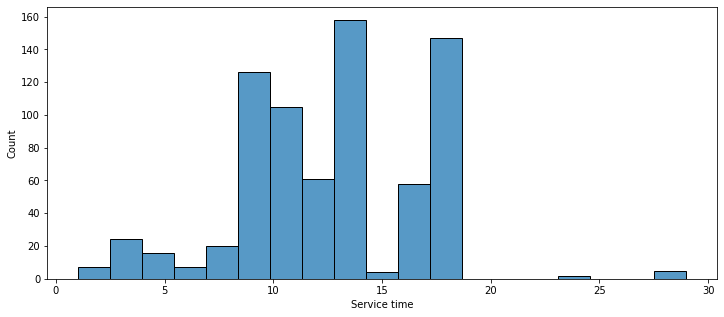

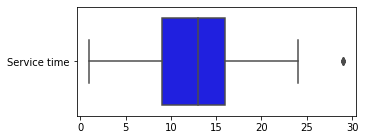

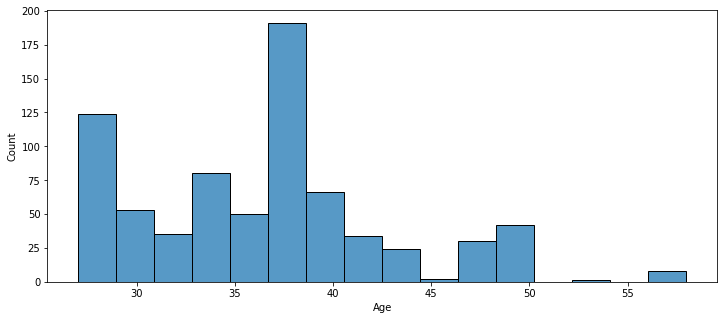

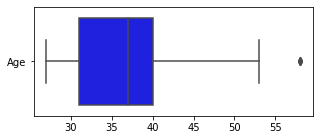

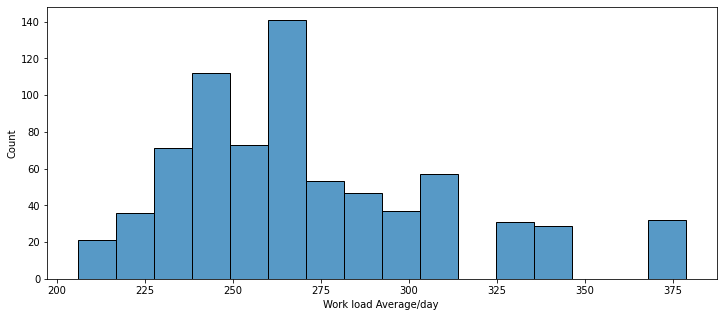

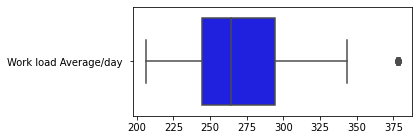

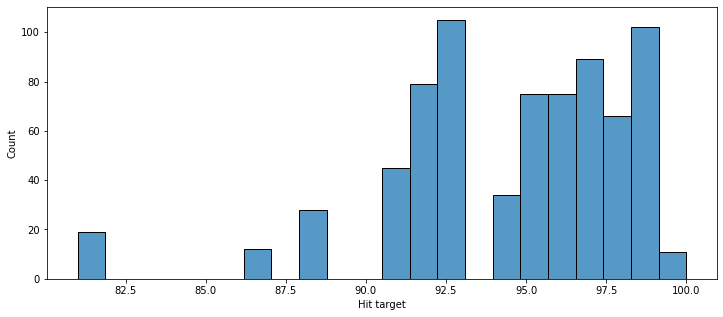

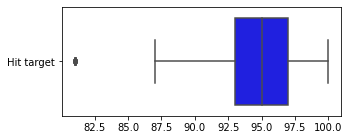

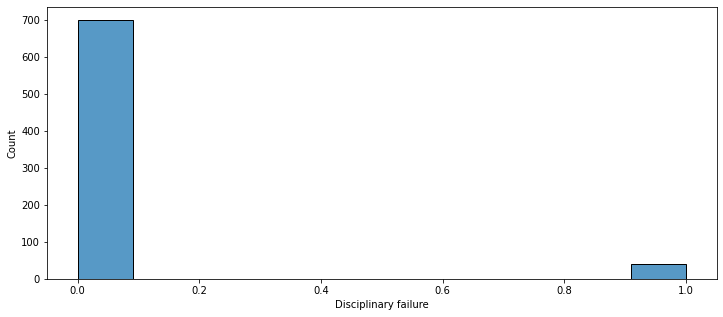

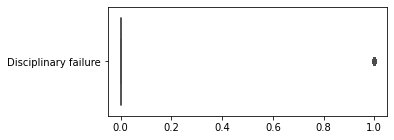

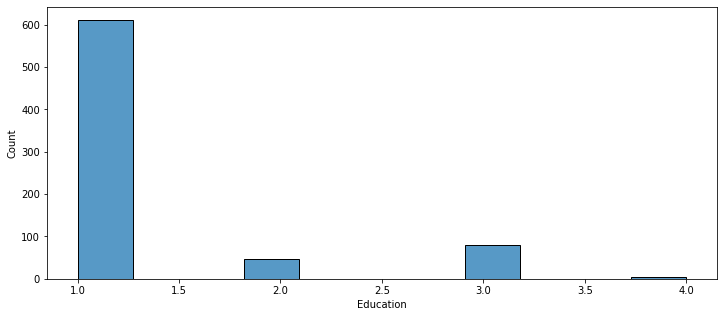

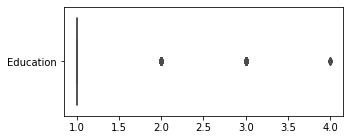

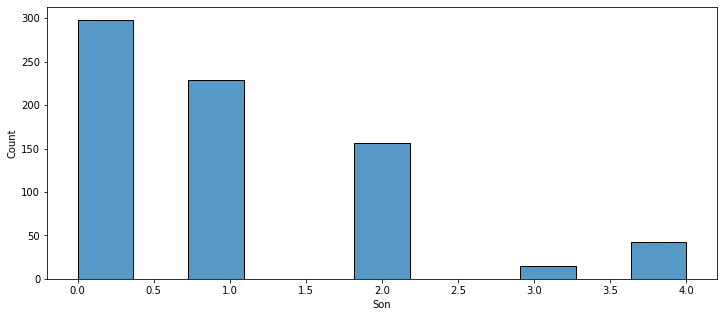

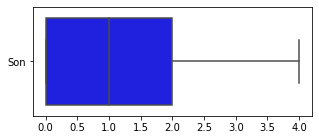

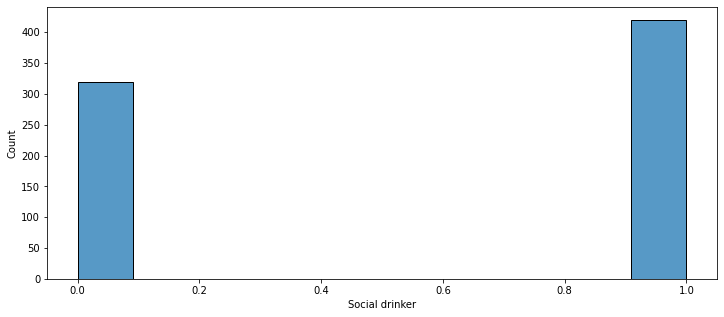

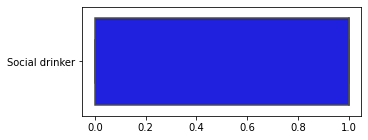

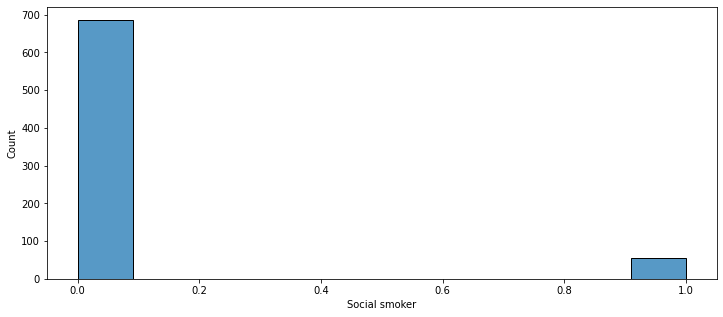

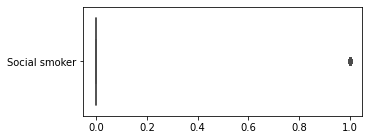

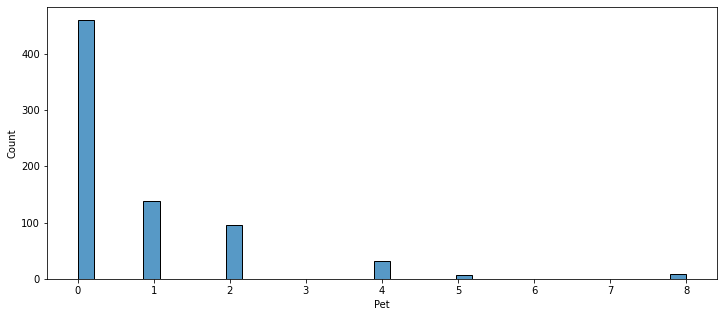

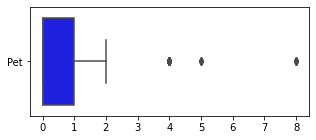

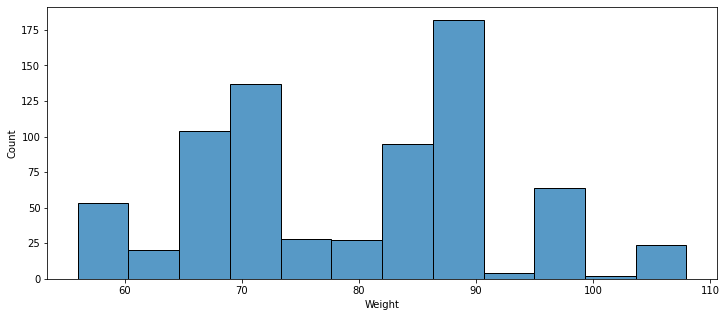

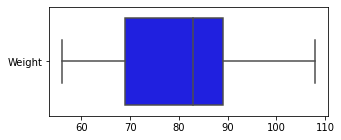

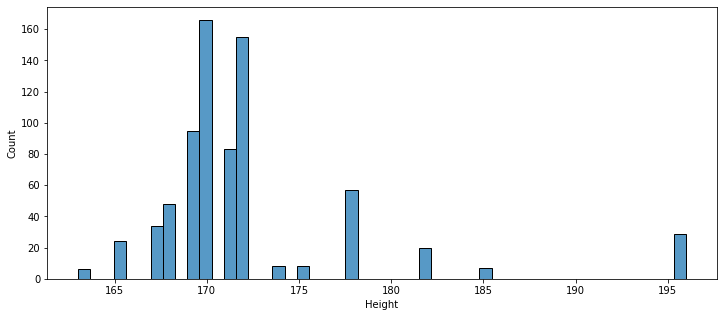

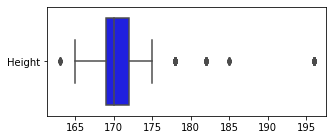

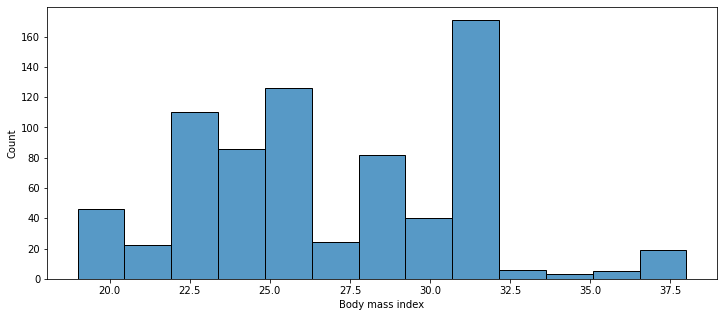

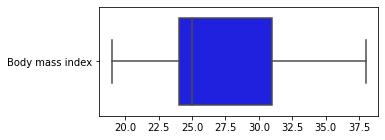

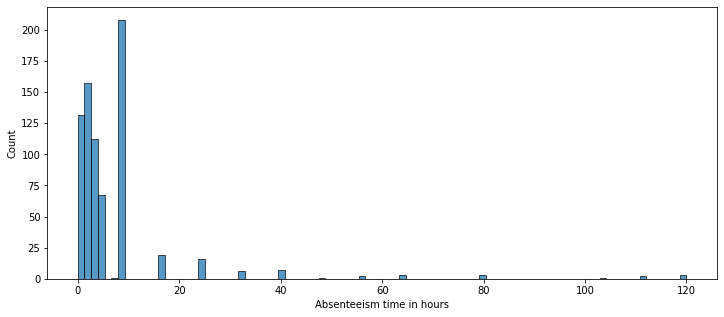

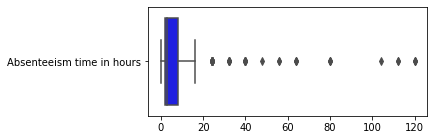

In [10]:
for col in df.columns:
    plt.figure(figsize=(12,5))
    sns.histplot(df[col],discrete=False)
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df[[col]],color="blue",orient="h")

Au regard de la distribution des variables, plusieurs constats:
- Avoir plus de 20 heures d'absence revêt d'un caractère plutôt exceptionnel par rapport au comportement d'ensemble
- Avoir une taille inférieure à 165 ou supérieure à 178 est peu courant dans l'ensemble 
- La plupart des travailleurs ont au plus 2 animaux de compagnie. Dans quelques cas atypiques, on note 4 à 8 animaux de compagnie
- Dans l'ensemble, avoir un diplôme de niveau 2 ou plus est exceptionnel
- Ceux qui ont un taux de réalisation des objectifs inférieur à 82% sont rares dans l'ensemmble 
- Avoir une charge de travail supérieure à 350 par jour est exceptionnel. En moyenne on a moins de 275 par jour
- La plupart des travailleurs ont entre 31 et 40 ans. Avoir plus de 55 ans est exceptionnel
- Pour le temps de service, rares sont ceux qui ont plus de 25.
- De même, les travailleurs ayant des frais de transport de plus de 375 sont rares. En moyenne, les frais de transport se trouvent entre 200 et 250
- Les absences sont constatées toutes les 4 saisons, de manière plus ou moins équilibrées
- Pour les raisons de l'abscence, on retrouve une catégorie égale à 0.  Dans le descriptif du jeu de données, les raisons d'absence varie normalement de 1 à 28. **La valeur 0 est donc une valeur non valide**. On supprime les lignes avec la raison 0 car on ne peut pas les exploiter. 

**Complément exploration**

* L'ID

In [11]:
print(df['ID'].unique().shape)

(36,)


Toutes les données (720 lignes, 20 colonnes) concernent 36 ID différents. Si un ID désigne une personne, cela signifie 36 personnes différentes. **Une conséquence de cette situation est la variation très faible de certaines caractéristiques de la personne au cours d'une période de 3 mois (durée du recensement)**

* La variable d'intérêt: heure d'absence

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


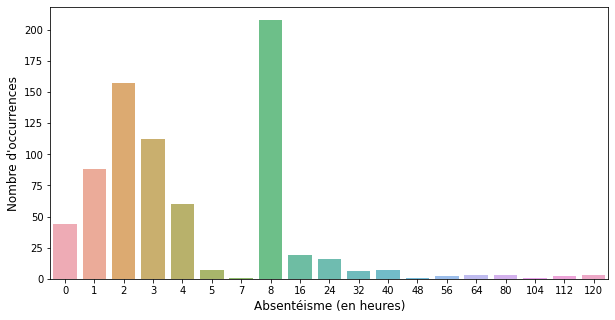

In [12]:
heures_absence  = df['Absenteeism time in hours'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(heures_absence.index, heures_absence.values, alpha=0.8)
plt.title('')
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xlabel('Absentéisme (en heures)', fontsize=12)
plt.show()

L'observation de la distribution permet de distinguer 2 ou 3 groupes d'absences
- Les absences de moins d'une journée et celles d'au moins une journée
- Les abscences inférieures ou égales à une démie journée (4 heures) ,celles entre une démie journée et une journée et celles de plus d'une journée

- Les absences les plus fréquentes sont celles de 8 heures (une journée de travail)

Nous pouvons donc regrouper les information de cette variable en 2 ou 3 classes.

A l'instar de cette variable, d'autres variables telles que l'âge, l'indice de masse corporelle, les frais de transport etc. peuvent être catégrisées


Nous proposons donc une étape transformation des données au point suivant

# Transformation 1

**Catégoriser la variable d'intérêt suivant plusieurs objectifs**

* **Objectif 1**: distinguer 3 classes d'absentéisme avec des enjeux différents selon la durée:
 - les absences assimilables à un retard: courte durée (<3h)
 - les absences de moyenne durée (>=3h et <8h) 
 - les absences assimilable à des arrêts: longue durée (> 1 jour)

* **Objectif 2**: distinguer deux classes d'absentéime relatif à l'organisation des remplacements
 - les absences de moins d'une journée: difficile à remplacer
 - les absences d'au moins une journée

* **Objectif 3**: objectif statistique tiré de la distribution de la variable
 - les absences d'au plus 7 heures (moins d'une journée)
 - les absences de 8 à 16 heures
 - les absences exceptionnelles (>20 h)

**Objectif 1**

In [13]:
def Categorize(x):

    if x<3 :
        return 0 #'< à 3h'
    elif x<8 :
        return 1 #'>= à 3h et < à 8h'
    else:
        return 2 #'>= à 8h'

df['cat_absence'] = df.apply(lambda row: Categorize(row['Absenteeism time in hours']), axis=1)
df['cat_absence'].value_counts()

0    289
2    271
1    180
Name: cat_absence, dtype: int64

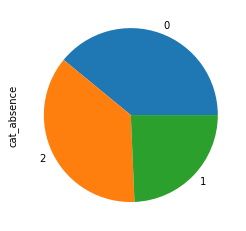

In [14]:
plt.figure()
df['cat_absence'] .value_counts().plot.pie()

**Objectif 2**

In [15]:
def Categorize(x):

    if x<8 :
        return 0 #'< à 8h'
    else:
        return 1 #'>= à 8h'

df['cat_absence_2'] = df.apply(lambda row: Categorize(row['Absenteeism time in hours']), axis=1)
df['cat_absence_2'].value_counts()

0    469
1    271
Name: cat_absence_2, dtype: int64

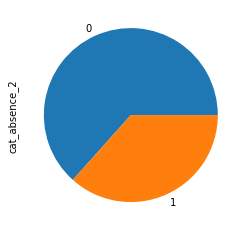

In [16]:
plt.figure()
df['cat_absence_2'] .value_counts().plot.pie()

**Objectif 3**

In [17]:
def Categorize(x):

    if x<8 :
        return 0 # '< à 8h'
    elif x<20:
        return 1 #'>= à 8h et <= 16h'
    else:
      return 2 # '> 16h'

df['cat_absence_3'] = df.apply(lambda row: Categorize(row['Absenteeism time in hours']), axis=1)
df['cat_absence_3'].value_counts()

0    469
1    227
2     44
Name: cat_absence_3, dtype: int64

**Catégoriser la variable âge**

**Objectif:** capter l'effet de la structure démographique. Découpage basée aussi sur la distribution

In [18]:
def CategorieAge(x):

    if x<32 :
        return 0
        #return "<32"
    elif x<37 :
        return 1
        #return "<37"
    elif x<40 :
        return 2
        #return "<40"
    else:
        #return ">=40"
        return 3

df['TrancheAge'] = df.apply(lambda row: CategorieAge(row['Age']), axis=1)
df['TrancheAge'].value_counts()


3    199
2    199
0    199
1    143
Name: TrancheAge, dtype: int64

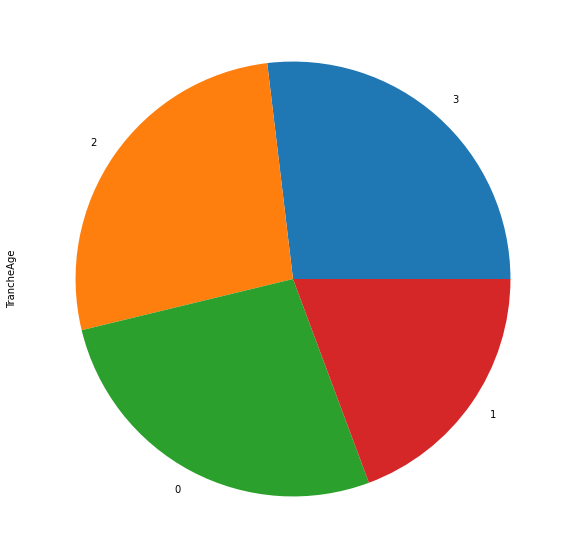

In [19]:
df['TrancheAge'].value_counts().plot.pie(y='TrancheAge',figsize=(10, 10))

**Catégoriser la variable taux de réalisation des objectifs**

**Objectif**: mesurer l'effet de taux de réalisation des objectifs 

Découpage selon niveau (basé sur la distribution):

-  Hit target <85 (Pas assez) 
- Hit target entre [85,90[ (Acceptable)
- Hit target entre  [90,94[ (Bon) 
- Hit target entre [94 et plus] (Très bon) 

In [20]:

def Categorize(x):

    if x<85 :
        return 1 #'<85 (Pas assez)'
    elif x<90 :
        return 2 # '[85,90[ (Acceptable)'
    elif x<94 :
        return 3 #'[90,94[ (Bon)'
    else:
      return 4 #'[94 et plus] (Très bon)'

df['cat_Hit_target'] = df.apply(lambda row: Categorize(row['Hit target']), axis=1)
df['cat_Hit_target'].value_counts()

4    452
3    229
2     40
1     19
Name: cat_Hit_target, dtype: int64

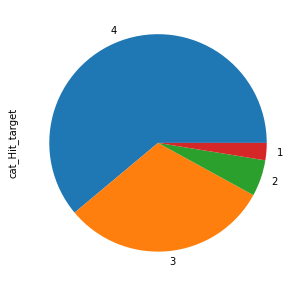

In [21]:
df['cat_Hit_target'].value_counts().plot.pie(y='cat_Hit_target',figsize=(5, 5))

**Catégoriser la variable frais de transport**

**Objectif**: mesurer l'effet des frais de transport 

Découpage selon niveau (basé sur la distribution):

- Transportation expense <150 (Faible) 
- Transportation expense entre [150,200[ (Assez)
- Transportation expense  [200,300[ (Elevé) 
- Transportation expense  [300 et plus] (Très élevé)) 


In [22]:
def Categorize(x):

    if x<150 :
        return 1 #'<150 (Faible)'
    elif x<200 :
        return 2 # '[150,200[ (Assez)'
    elif x<300 :
        return 3 #'[200,300[ (Elevé)'
    else:
      return 4 #'[300 et plus] (Très élevé)'

df['cat_Transportation_expense'] = df.apply(lambda row: Categorize(row['Transportation expense']), axis=1)
df['cat_Transportation_expense'].value_counts()

3    346
2    231
1     92
4     71
Name: cat_Transportation_expense, dtype: int64

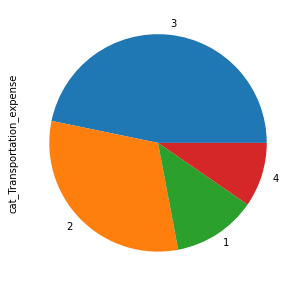

In [23]:
df['cat_Transportation_expense'].value_counts().plot.pie(y='cat_Transportation_expense',figsize=(5, 5))

**Catégoriser la variable indice de masse corporelle**

**Objectif**: reprendre la catégorisation standard 

Découpage selon niveau (basé sur référence standard):

- Body mass index <18.5 (Underweight) 
- Body mass index  entre [18.5,25[ (Healthy Weight)
- Body mass index entre [25,30[ (Overweight) 
- Body mass index entre  [30 et plus] (Obesity)  



In [24]:
def Categorize(x):

    if x<18.5 :
        return 1 #'<18.5 (Underweight)'
    elif x<25 :
        return 2 # '[18.5,25[ (Healthy Weight)'
    elif x<30 :
        return 3 #'[25,30[ (Overweight)'
    else:
      return 4 #'[30 et plus] (Obesity)'

df['cat_Body_mass_index'] = df.apply(lambda row: Categorize(row['Body mass index']), axis=1)
df['cat_Body_mass_index'].value_counts()

2    264
4    244
3    232
Name: cat_Body_mass_index, dtype: int64

# Selection 1 par filtrage des variables

Quelques critères de référence:
- Des variables indépendantes fortement corrélées entre elles sont redondante en information choisir 1 entre elle
- Des variables sans variance ne sont pas informatives

**Le critère de la corrélation**

Base sans les variables catégorielles ajoutées

In [25]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'cat_absence', 'cat_absence_2',
       'cat_absence_3', 'TrancheAge', 'cat_Hit_target',
       'cat_Transportation_expense', 'cat_Body_mass_index'],
      dtype='object')

In [26]:
listecor=['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']

In [27]:
dfcor=df[listecor] 

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


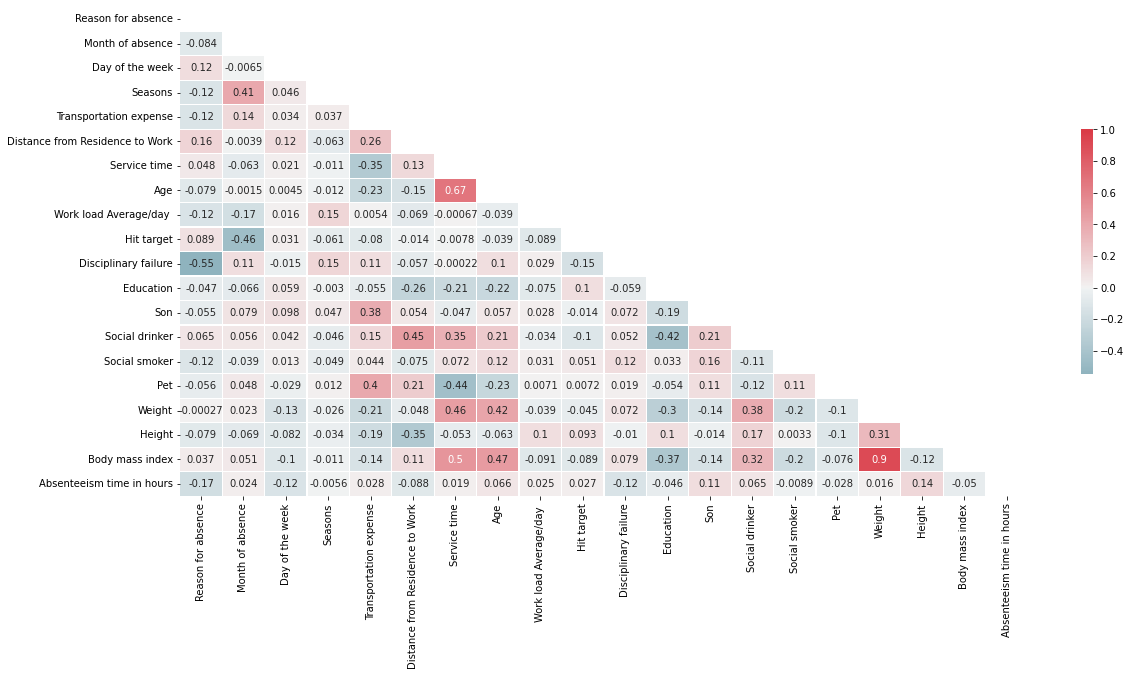

In [28]:
# understand correlaton between data
import seaborn as sb
import numpy as np
corr = dfcor.corr()
cmap = sb.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19, 9))
# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,annot = True, square=False, linewidths=.2, cbar_kws={"shrink": .5});

Deux relations se font remarquer:
- la corrélation entre l'indice de masse corporelle et le poids

- la corrélation entre le temps de service et l'âge.

**Le critère de la variance**

In [29]:
dfcor.var()

Reason for absence                   71.122335
Month of absence                     11.808068
Day of the week                       2.021159
Seasons                               1.236168
Transportation expense             4482.600197
Distance from Residence to Work     220.130291
Service time                         19.227115
Age                                  41.974493
Work load Average/day              1525.536440
Hit target                           14.283208
Disciplinary failure                  0.051201
Education                             0.453249
Son                                   1.206678
Social drinker                        0.245767
Social smoker                         0.067739
Pet                                   1.737805
Weight                              165.977113
Height                               36.421159
Body mass index                      18.365101
Absenteeism time in hours           177.715510
dtype: float64

* La variable diciplinary faillure et social smoker ont une variance faible
* Le poids a une variance supérieure à l'IMC

**Choix**
* Ne pas retenir disciplinary faillure et social smoker
* Retenir l'âge et le temps de service car la corrélation n'est pas trop forte
* Retenir l'IMC au lieu du poids car l'IMC donne une information sur la santé mais le poids seul ne donne pas d'information propre


**Filtrage 1**

ID ne nous apporte pas d'information propre
Poids à enlever
Disciplinary faillure à enlever
Social Smoker à enlever

In [30]:
#df.columns

In [31]:
ind_f1=['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Education', 'Son', 'Social drinker',
        'Pet', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'cat_absence', 'cat_absence_2',
       'cat_absence_3', 'TrancheAge', 'cat_Hit_target',
       'cat_Transportation_expense', 'cat_Body_mass_index']

Base filtrée

In [32]:
df=df[ind_f1]

In [33]:
#df.columns

In [34]:
#df.shape

# Selection 2 par filtrage des variables

Parmi les raisons d'absence, la raison 15 évoque la naissance d'un enfant ou la grossesse. On estime généralement que les absences pour accouchement sont prévisibles donc moins problématiques.

 **Les absences avec la raison 15 sont donc sans intérêt propre pour notre analyse de prédiction de classe**

In [35]:
df=df[df['Reason for absence']!=15]

In [36]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9,  4,  3,  2, 16])

In [37]:
df.shape

(738, 24)

# Transformation des variables catégorielles

**Distinguer les bases de données selon les objectifs relatifs à la classification**

**OBJECTIF 1**: df1

In [38]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Education', 'Son', 'Social drinker', 'Pet', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'cat_absence',
       'cat_absence_2', 'cat_absence_3', 'TrancheAge', 'cat_Hit_target',
       'cat_Transportation_expense', 'cat_Body_mass_index'],
      dtype='object')

In [39]:
supo1=['cat_absence_2', 'cat_absence_3']
df1=df.drop(columns=supo1)

**OBJECTIF 2**: df2

In [40]:
supo2=['cat_absence', 'cat_absence_3']
df2=df.drop(columns=supo2)

**OBJECTIF 3**: df3

In [41]:
supo3=['cat_absence_2', 'cat_absence']
df3=df.drop(columns=supo3)

***Nous allons nous concentrer sur l'Objectif 1***

Tansformation

In [42]:
df1.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Education', 'Son', 'Social drinker', 'Pet', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'cat_absence',
       'TrancheAge', 'cat_Hit_target', 'cat_Transportation_expense',
       'cat_Body_mass_index'],
      dtype='object')

In [43]:
mycolumns3 = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
        'Distance from Residence to Work',
       'Service time', 'Work load Average/day ',
       'Education', 'Son', 'Social drinker', 'Pet', 'Height','cat_absence',
       'TrancheAge', 'cat_Hit_target', 'cat_Transportation_expense',
       'cat_Body_mass_index']

#y = df1['cat_absence']

In [44]:
X_selection3 = df1[mycolumns3]

In [45]:
data_dummies3 = pd.get_dummies(X_selection3, columns=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Education', 'Son', 'Social drinker', 'Pet',
       'TrancheAge', 'cat_Hit_target', 'cat_Transportation_expense',
       'cat_Body_mass_index'])


In [85]:
#data_dummies3.columns

Index(['Distance from Residence to Work', 'Service time',
       'Work load Average/day ', 'Height', 'cat_absence',
       'Reason for absence_0', 'Reason for absence_1', 'Reason for absence_2',
       'Reason for absence_3', 'Reason for absence_4', 'Reason for absence_5',
       'Reason for absence_6', 'Reason for absence_7', 'Reason for absence_8',
       'Reason for absence_9', 'Reason for absence_10',
       'Reason for absence_11', 'Reason for absence_12',
       'Reason for absence_13', 'Reason for absence_14',
       'Reason for absence_16', 'Reason for absence_17',
       'Reason for absence_18', 'Reason for absence_19',
       'Reason for absence_21', 'Reason for absence_22',
       'Reason for absence_23', 'Reason for absence_24',
       'Reason for absence_25', 'Reason for absence_26',
       'Reason for absence_27', 'Reason for absence_28', 'Month of absence_0',
       'Month of absence_1', 'Month of absence_2', 'Month of absence_3',
       'Month of absence_4', 'Month of a

In [46]:
mycolumns2 = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
        'Distance from Residence to Work',
       'Service time', 'Work load Average/day ',
       'Education', 'Son', 'Social drinker', 'Pet', 'Height',
       'TrancheAge', 'cat_Hit_target', 'cat_Transportation_expense',
       'cat_Body_mass_index']
X_selection2 = df1[mycolumns2]
y = df1['cat_absence']

In [47]:
data_dummies2 = pd.get_dummies(X_selection2, columns=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Education', 'Son', 'Social drinker', 'Pet',
       'TrancheAge', 'cat_Hit_target', 'cat_Transportation_expense',
       'cat_Body_mass_index'])
display(data_dummies2.columns)
data_dummies2.shape

Index(['Distance from Residence to Work', 'Service time',
       'Work load Average/day ', 'Height', 'Reason for absence_0',
       'Reason for absence_1', 'Reason for absence_2', 'Reason for absence_3',
       'Reason for absence_4', 'Reason for absence_5', 'Reason for absence_6',
       'Reason for absence_7', 'Reason for absence_8', 'Reason for absence_9',
       'Reason for absence_10', 'Reason for absence_11',
       'Reason for absence_12', 'Reason for absence_13',
       'Reason for absence_14', 'Reason for absence_16',
       'Reason for absence_17', 'Reason for absence_18',
       'Reason for absence_19', 'Reason for absence_21',
       'Reason for absence_22', 'Reason for absence_23',
       'Reason for absence_24', 'Reason for absence_25',
       'Reason for absence_26', 'Reason for absence_27',
       'Reason for absence_28', 'Month of absence_0', 'Month of absence_1',
       'Month of absence_2', 'Month of absence_3', 'Month of absence_4',
       'Month of absence_5', 'Mon

(738, 85)

# **Feature selection 3**

Dans cette partie, nous mobilisons plusieurs méthodes pour la sélection des variables permettant d'avoir le meilleur résultat possible étant donnés les paramètres du modèle

***Méthode 1:  SelectFromModel Random forest***

Principe: proposer une liste de variables permettant d'avoir une meilleure performance

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100)
                                      ) #, max_features=10)
embeded_rf_selector.fit(data_dummies2, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = data_dummies2.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

26 selected features
['Distance from Residence to Work', 'Service time', 'Work load Average/day ', 'Height', 'Reason for absence_0', 'Reason for absence_13', 'Reason for absence_19', 'Reason for absence_22', 'Reason for absence_23', 'Reason for absence_25', 'Reason for absence_27', 'Reason for absence_28', 'Month of absence_2', 'Month of absence_3', 'Day of the week_2', 'Day of the week_3', 'Day of the week_4', 'Day of the week_5', 'Day of the week_6', 'Seasons_1', 'Seasons_2', 'Seasons_3', 'Seasons_4', 'TrancheAge_1', 'cat_Hit_target_3', 'cat_Hit_target_4']



**Méthode 2:  Filtre par la corrélation**

Principe: proposer une liste de variables les plus corrélées à la variable cible

Limite: le nombre num_feats est arbitraire

In [49]:
from scipy.stats import kendalltau, pearsonr, spearmanr

In [50]:
def pearsonr_pval(x,y):
  return pearsonr(x,y)[1]
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = data_dummies2.columns.tolist()
    # calculate the correlation with y for each feature
    for i in data_dummies2.columns.tolist():
      #pndasDF.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
        cor = data_dummies2.apply(lambda x : pd.factorize(x)[0]).corr(method=pearsonr_pval, min_periods=1).to_numpy()[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = data_dummies2.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(data_dummies2, y,25)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

25 selected features
['Service time', 'Reason for absence_14', 'Reason for absence_16', 'Reason for absence_17', 'Reason for absence_18', 'Month of absence_8', 'Month of absence_7', 'Month of absence_6', 'Month of absence_5', 'Month of absence_4', 'Month of absence_3', 'Month of absence_2', 'Month of absence_1', 'Month of absence_10', 'Month of absence_0', 'Reason for absence_27', 'Reason for absence_26', 'Reason for absence_25', 'Reason for absence_24', 'Reason for absence_23', 'Reason for absence_22', 'Reason for absence_21', 'Reason for absence_19', 'Reason for absence_28', 'cat_Body_mass_index_4']


***Méthode 4: Sélection PAR CHI-2***

Pincipe: proposer une liste ayant le lien le plus important avec la variable cible

Limite: le nombre k est arbitraire

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(data_dummies2)
chi_selector = SelectKBest(chi2, k=25)
chi_selector.fit(X_norm.astype(int), y)
chi_support = chi_selector.get_support()
chi_feature = data_dummies2.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

25 selected features
['Distance from Residence to Work', 'Reason for absence_0', 'Reason for absence_1', 'Reason for absence_6', 'Reason for absence_10', 'Reason for absence_13', 'Reason for absence_18', 'Reason for absence_19', 'Reason for absence_22', 'Reason for absence_23', 'Reason for absence_25', 'Reason for absence_26', 'Reason for absence_27', 'Reason for absence_28', 'Month of absence_1', 'Month of absence_7', 'Son_2', 'Son_3', 'Son_4', 'Pet_4', 'TrancheAge_1', 'TrancheAge_2', 'TrancheAge_3', 'cat_Transportation_expense_4', 'cat_Body_mass_index_3']


***Méthode 3: Sélection PAR RFE (Recursive Feature elimination)***

Principe: Propose une liste minimal avec la meilleure performance

In [52]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
#from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=100), #rf_dum,
                   step=25,verbose=5)#, n_features_to_select=num_feats, step=10, verbose=5)
X_norm = MinMaxScaler().fit_transform(data_dummies2)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = data_dummies2.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 85 features.
Fitting estimator with 60 features.
42 selected features
['Distance from Residence to Work', 'Service time', 'Work load Average/day ', 'Height', 'Reason for absence_0', 'Reason for absence_13', 'Reason for absence_19', 'Reason for absence_22', 'Reason for absence_23', 'Reason for absence_25', 'Reason for absence_26', 'Reason for absence_27', 'Reason for absence_28', 'Month of absence_1', 'Month of absence_2', 'Month of absence_3', 'Month of absence_5', 'Month of absence_6', 'Month of absence_7', 'Month of absence_10', 'Day of the week_2', 'Day of the week_3', 'Day of the week_4', 'Day of the week_5', 'Day of the week_6', 'Seasons_1', 'Seasons_2', 'Seasons_3', 'Seasons_4', 'Son_2', 'Social drinker_0', 'Social drinker_1', 'TrancheAge_1', 'TrancheAge_2', 'TrancheAge_3', 'cat_Hit_target_3', 'cat_Hit_target_4', 'cat_Transportation_expense_2', 'cat_Transportation_expense_3', 'cat_Transportation_expense_4', 'cat_Body_mass_index_2', 'cat_Body_mass_index_3']


# **Résumé des différentes listes**

"True" indique "retenir"

In [53]:
feature_name = data_dummies2.columns.tolist()
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 
                                     'Pearson':cor_support, 
                                     'Chi-2':chi_support, 
                                     'RFE':rfe_support, #'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support #, 'LightGBM':embeded_lgb_support
                                     })
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [54]:
feature_selection_df.iloc[:59]

,Feature,Pearson,Chi-2,RFE,Random Forest,Total
1,Reason for absence_28,True,True,True,True,4
2,Reason for absence_27,True,True,True,True,4
3,Reason for absence_25,True,True,True,True,4
4,Reason for absence_23,True,True,True,True,4
5,Reason for absence_22,True,True,True,True,4
6,Reason for absence_19,True,True,True,True,4
7,TrancheAge_1,False,True,True,True,3
8,Service time,True,False,True,True,3
9,Reason for absence_26,True,True,True,False,3
10,Reason for absence_13,False,True,True,True,3


**Notre critère de sélection:** 
- Combiner le résultat de différentes méthodes de sélection
  - Sur les 4 retenir les variables ayant eu plus de 3 votes (vote majoritaire)
  - Comparer avec les variables ayant eu plus de 3 votes
  - Comparer les variables ayant eu plus de 2 votes
  - Comparer avec les variables ayant le vote RFE
  - Comparer avec les variables ayant le vote Peason
  - Comparer avec les variables ayant le vote Chi-2
  
  - Resestimer le modèle sur avec les variables retenues 

# **Liste de variables obtenue**

In [55]:
feature_selection_df_sel=feature_selection_df[feature_selection_df['Random Forest']==True]['Feature'].tolist()
feature_selection_df_sel

['Reason for absence_28',
 'Reason for absence_27',
 'Reason for absence_25',
 'Reason for absence_23',
 'Reason for absence_22',
 'Reason for absence_19',
 'TrancheAge_1',
 'Service time',
 'Reason for absence_13',
 'Reason for absence_0',
 'Month of absence_3',
 'Month of absence_2',
 'Distance from Residence to Work',
 'cat_Hit_target_4',
 'cat_Hit_target_3',
 'Work load Average/day ',
 'Seasons_4',
 'Seasons_3',
 'Seasons_2',
 'Seasons_1',
 'Height',
 'Day of the week_6',
 'Day of the week_5',
 'Day of the week_4',
 'Day of the week_3',
 'Day of the week_2']

# **Clustering**

**KMeans**

In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats

**Données et normalisation**

In [87]:
feature_selection_df_selkm=['Reason for absence_28', 'Reason for absence_27', 'Reason for absence_25',
 'Reason for absence_23', 'Reason for absence_22', 'Reason for absence_19', 'TrancheAge_1', 'Service time',
 'Reason for absence_13', 'Reason for absence_0', 'Month of absence_3', 'Month of absence_2', 'Distance from Residence to Work',
 'cat_Hit_target_4', 'cat_Hit_target_3', 'Work load Average/day ', 'Seasons_4', 'Seasons_3', 'Seasons_2',
 'Seasons_1', 'Height', 'Day of the week_6', 'Day of the week_5', 'Day of the week_4', 'Day of the week_3',
 'Day of the week_2','cat_absence']

In [88]:
df_dum_feature_selection_df_sel_km=data_dummies3[feature_selection_df_selkm]

In [89]:
df_dum_feature_selection_df_sel_km_std = stats.zscore(df_dum_feature_selection_df_sel_km[feature_selection_df_selkm])

**Trouver le meilleur k**

In [90]:
liste=[]
for i in range(2,50):
  dkmeans= KMeans(n_clusters=i, random_state=0).fit(df_dum_feature_selection_df_sel_km_std)
  #dkmeans.inertia_
  liste.append(dkmeans.inertia_)

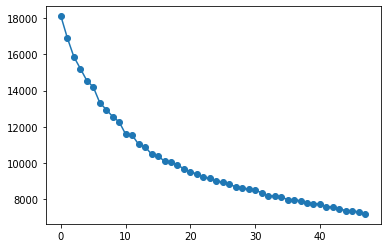

In [91]:
import matplotlib.pyplot as plt
plt.plot(liste, 'o-')

Un coude vers 3 ou 13

**Les clusters (avec 13 et 3 groupes)**

In [92]:
kmeans= KMeans(n_clusters=13, random_state=0).fit(df_dum_feature_selection_df_sel_km_std)

In [93]:
kmeans2= KMeans(n_clusters=3, random_state=0).fit(df_dum_feature_selection_df_sel_km_std)

In [94]:
labels = kmeans.labels_

In [95]:
labels2 = kmeans2.labels_

In [96]:
df_dum_feature_selection_df_sel_km['clusters'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
df_dum_feature_selection_df_sel_km['clusters2'] = labels2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
df_dum_feature_selection_df_sel_km['clusters'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
adlist=['clusters']
colmns2=df_dum_feature_selection_df_sel_km.columns

In [100]:
adlist=['clusters2']
colmns22=df_dum_feature_selection_df_sel_km.columns

In [65]:
print(df_dum_feature_selection_df_sel_km[colmns2].groupby(['clusters']).mean())

          Reason for absence_28  Reason for absence_27  Reason for absence_25  \
clusters                                                                        
0                      0.000000                    0.0                    0.0   
1                      0.000000                    0.0                    0.0   
2                      0.000000                    0.0                    0.0   
3                      0.000000                    1.0                    0.0   
4                      0.276190                    0.0                    0.0   
5                      0.173077                    0.0                    0.0   
6                      0.000000                    0.0                    1.0   
7                      0.166667                    0.0                    0.0   
8                      1.000000                    0.0                    0.0   
9                      0.000000                    0.0                    0.0   
10                     0.000

In [111]:
kmeans2.inertia_ #Avec 3 groupes

16894.333049610002

In [112]:
kmeans.inertia_ #Avec 13 groupes

11548.650783402372

***Les informations permettent un regroupement en 3 classes environ.***

In [110]:
kmeans2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [101]:
#df_dum_feature_selection_df_sel_km['clusters'].value_counts().plot.pie(y='clusters',figsize=(10, 10))
values=df_dum_feature_selection_df_sel_km['clusters'].value_counts()
labels=df_dum_feature_selection_df_sel_km['clusters'].unique().tolist()
values2=df_dum_feature_selection_df_sel_km['clusters2'].value_counts()
labels2=df_dum_feature_selection_df_sel_km['clusters2'].unique().tolist()
import plotly.express as px
px.pie(values=values, names=labels)
px.pie(values=values2, names=labels2)

**Comparaison avec la catégorie d'absence**

In [84]:
#df_dum_feature_selection_df_sel_km.columns

Index(['Reason for absence_28', 'Reason for absence_27',
       'Reason for absence_25', 'Reason for absence_23',
       'Reason for absence_22', 'Reason for absence_19', 'TrancheAge_1',
       'Service time', 'Reason for absence_13', 'Reason for absence_0',
       'Month of absence_3', 'Month of absence_2',
       'Distance from Residence to Work', 'cat_Hit_target_4',
       'cat_Hit_target_3', 'Work load Average/day ', 'Seasons_4', 'Seasons_3',
       'Seasons_2', 'Seasons_1', 'Height', 'Day of the week_6',
       'Day of the week_5', 'Day of the week_4', 'Day of the week_3',
       'Day of the week_2', 'clusters', 'clusters2'],
      dtype='object')

**Quelques graphiques**

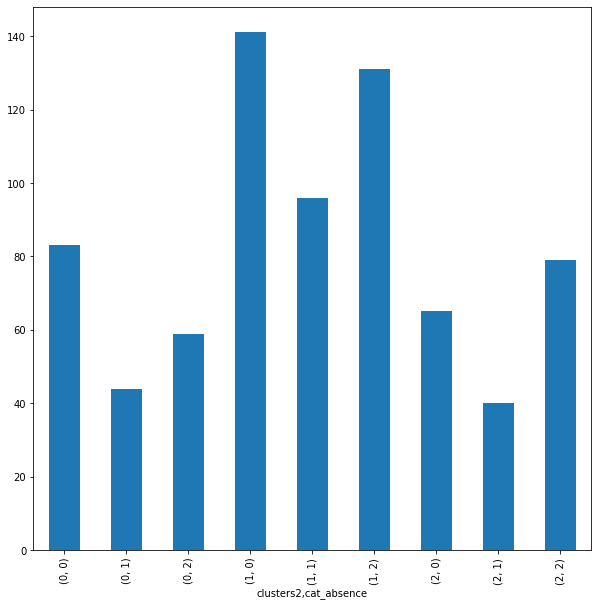

In [102]:
df_dum_feature_selection_df_sel_km.groupby(['clusters2','cat_absence']).size().plot(kind = 'bar',figsize=(10, 10))

**Exemple2**: classe selon charge de travail et distance domicile travail

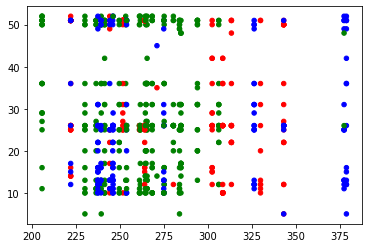

In [118]:
colormap=np.array(["red", "green", "blue"])
plt.scatter(df_dum_feature_selection_df_sel_km['Work load Average/day '], df_dum_feature_selection_df_sel_km['Distance from Residence to Work'], c=colormap[kmeans2.labels_], s=20)
plt.show()

# **CLASSIFICATIONS**


Nous mobilisons plusieurs méthodes afin de les comparer et choisir la meilleure

# KNN

In [141]:
from sklearn.model_selection import train_test_split, cross_validate

Les k plus proches voisins

**Recherche features par la méthode  forward**

**LEs données**

In [142]:
X_dummies2_train, X_dummies2_test, y_dummies2_train, y_dummies2_test = train_test_split(data_dummies2, y, shuffle = True)


best combination (Score: 0.629): (0, 4, 6, 7, 8, 9, 10, 13, 17, 19, 25, 27, 29, 30, 43, 47, 56, 66)

all subsets:
 {1: {'feature_idx': (0,), 'cv_scores': array([0.45045045, 0.36936937, 0.40540541, 0.49090909, 0.5       ]), 'avg_score': 0.4432268632268633, 'feature_names': ('Distance from Residence to Work',)}, 2: {'feature_idx': (0, 30), 'cv_scores': array([0.47747748, 0.45045045, 0.47747748, 0.55454545, 0.53636364]), 'avg_score': 0.49926289926289924, 'feature_names': ('Distance from Residence to Work', 'Reason for absence_28')}, 3: {'feature_idx': (0, 25, 30), 'cv_scores': array([0.52252252, 0.54954955, 0.45945946, 0.55454545, 0.56363636]), 'avg_score': 0.5299426699426699, 'feature_names': ('Distance from Residence to Work', 'Reason for absence_23', 'Reason for absence_28')}, 4: {'feature_idx': (0, 4, 25, 30), 'cv_scores': array([0.52252252, 0.54954955, 0.4954955 , 0.60909091, 0.63636364]), 'avg_score': 0.5626044226044227, 'feature_names': ('Distance from Residence to Work', 'Reason f

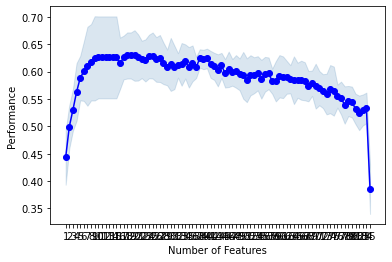

In [143]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

sfs = SFS(knn, 
          k_features='best', 
          forward=True, 
          floating=False,
          scoring='accuracy',
          cv=5)

sfsknn = sfs.fit(X_dummies2_train, y_dummies2_train)
print('best combination (Score: %.3f): %s\n' % (sfsknn.k_score_, sfsknn.k_feature_idx_))
print('all subsets:\n', sfsknn.subsets_)
fig1knn = plot_sfs(sfsknn.get_metric_dict(),
                kind='std_dev')



**Récupération de la liste**

In [144]:
lknn=list(sfsknn.k_feature_idx_)
lknn

[0, 4, 6, 7, 8, 9, 10, 13, 17, 19, 25, 27, 29, 30, 43, 47, 56, 66]

In [145]:
selected_x_fw_knn=data_dummies2.columns[lknn]
selected_x_fw_knn

Index(['Distance from Residence to Work', 'Reason for absence_0',
       'Reason for absence_2', 'Reason for absence_3', 'Reason for absence_4',
       'Reason for absence_5', 'Reason for absence_6', 'Reason for absence_9',
       'Reason for absence_13', 'Reason for absence_16',
       'Reason for absence_23', 'Reason for absence_25',
       'Reason for absence_27', 'Reason for absence_28', 'Month of absence_12',
       'Day of the week_5', 'Education_4', 'Pet_2'],
      dtype='object')

**La base**

In [146]:
data_dummies2_fw_knn=data_dummies2[selected_x_fw_knn]

**Normalisation**

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_dummies2_fw_knn_std=scaler.fit(data_dummies2_fw_knn)

**Train-Test**

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_dummies2_fw_knn_train, X_dummies2_fw_knn_test, y_dummies2_fw_knn_train, y_dummies2_fw_knn_test = train_test_split(data_dummies2_fw_knn, y, shuffle = True)


**Le regroupement**

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn_fw = KNeighborsClassifier()
knn_fw.fit(X_dummies2_fw_knn_train,y_dummies2_fw_knn_train)
y_pred_knn=knn_fw.predict(X_dummies2_fw_knn_test)

print(f"Testing accuracy: {round(accuracy_score(y_pred_knn, y_dummies2_fw_knn_test),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(knn_fw, data_dummies2_fw_knn, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(knn_fw, data_dummies2_fw_knn, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 61.62%
Average testing accuracy 5-fold: 59.07%
Average testing accuracy 10-fold: 59.21%


**La matrice de confusion**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


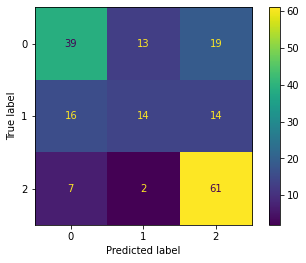

In [151]:
plot_confusion_matrix(knn_fw, X_dummies2_fw_knn_test, y_dummies2_fw_knn_test, values_format='d')

**Le rapport de performance**

In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_dummies2_fw_knn_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59        71
           1       0.48      0.32      0.38        44
           2       0.65      0.87      0.74        70

    accuracy                           0.62       185
   macro avg       0.59      0.58      0.57       185
weighted avg       0.60      0.62      0.60       185



**Rechercher le k optimal**

In [153]:
kliste = []
# Might take some time
for i in range(1,40):
    
    knn_fw = KNeighborsClassifier(n_neighbors=i)
    knn_fw.fit(X_dummies2_fw_knn_train,y_dummies2_fw_knn_train)
    pred_i = knn_fw.predict(X_dummies2_fw_knn_test)
    kliste.append(np.mean(pred_i != y_dummies2_fw_knn_test))

**Graphique**

Text(0, 0.5, "Taux d'erreur")

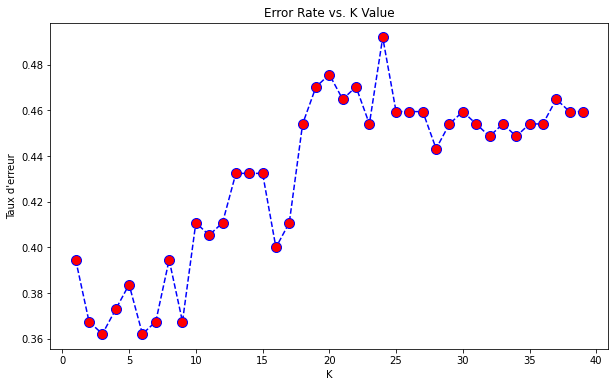

In [154]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),kliste,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Taux d\'erreur')

***La valeur k qui minimise les erreurs de prédiction est: 5***

**Réestimation**

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn_fw = KNeighborsClassifier(n_neighbors=5)
knn_fw.fit(X_dummies2_fw_knn_train,y_dummies2_fw_knn_train)
y_pred_knn=knn_fw.predict(X_dummies2_fw_knn_test)

print(f"Testing accuracy: {round(accuracy_score(y_pred_knn, y_dummies2_fw_knn_test),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(knn_fw, data_dummies2_fw_knn, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(knn_fw, data_dummies2_fw_knn, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 61.62%
Average testing accuracy 5-fold: 59.07%
Average testing accuracy 10-fold: 59.21%


Le k optimal est celui choisi par défaut. 

# **Conclusion KNN**



* Avec les KNN, nous avons une performance globale située entre 60 et 70.

* La classe 1 est la classe ayant une faible précision.

# ARBRE DE DESICION

> Nous proposons une première approche de classification appelée arbre de décision. 

En fonction des valeurs de chacune des variables en input, combinées si nécessaire les unes aux autres, on puisse savoir ou prédir dans quelle classe ranger cet individu (absence)



***Avec la liste préselectionée***

**La Base**

In [156]:
df_dum_feature_selection_df_sel=data_dummies2[feature_selection_df_sel]

**Train-Test**

In [157]:
from sklearn.model_selection import train_test_split, cross_validate

In [158]:
X_feature_selection_df_sel_train, X_feature_selection_df_sel_test, y_feature_selection_df_sel_train, y_feature_selection_df_sel_test = train_test_split(df_dum_feature_selection_df_sel, y, shuffle = True)


In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score,  plot_confusion_matrix

In [160]:

arbre_decision_dum_psel = DecisionTreeClassifier(max_depth=5,random_state=0,criterion="gini")
arbre_decision_dum_psel.fit(X_feature_selection_df_sel_train,y_feature_selection_df_sel_train)
y_pred_dum = arbre_decision_dum_psel.predict(X_feature_selection_df_sel_test)

print(f"Testing accuracy: {round(accuracy_score(y_pred_dum, y_feature_selection_df_sel_test),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(arbre_decision_dum_psel, df_dum_feature_selection_df_sel, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(arbre_decision_dum_psel, df_dum_feature_selection_df_sel, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 62.7%
Average testing accuracy 5-fold: 65.02%
Average testing accuracy 10-fold: 65.44%


**Le rapport de performance**

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_feature_selection_df_sel_test, y_pred_dum))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        81
           1       0.46      0.23      0.31        47
           2       0.61      0.89      0.72        57

    accuracy                           0.63       185
   macro avg       0.59      0.60      0.57       185
weighted avg       0.61      0.63      0.60       185



**Arbre**

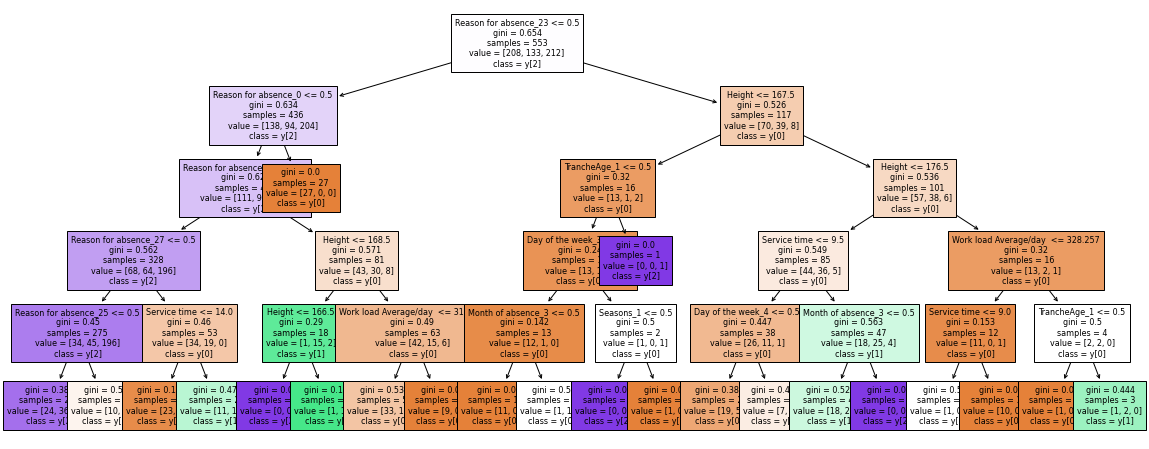

In [162]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
plt.figure(figsize=(20, 8))
tree.plot_tree(arbre_decision_dum_psel, fontsize=8, filled=True,node_ids=False,feature_names=df_dum_feature_selection_df_sel.columns.tolist(),class_names=True)
plt.savefig('tree_high_dpi_sel', dpi=150)
plt.show()

***AVEC LA BASE DE DONNEES GLOBALE***

**La base de données**

In [163]:
X_dummies2_train, X_dummies2_test, y_dummies2_train, y_dummies2_test = train_test_split(data_dummies2, y, shuffle = True)


In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score,  plot_confusion_matrix

In [165]:

arbre_decision_dum = DecisionTreeClassifier(max_depth=5,random_state=0,criterion="gini")
arbre_decision_dum.fit(X_dummies2_train,y_dummies2_train)
y_pred_dum = arbre_decision_dum.predict(X_dummies2_test)

print(f"Testing accuracy: {round(accuracy_score(y_pred_dum, y_dummies2_test),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(arbre_decision_dum, data_dummies2, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(arbre_decision_dum, data_dummies2, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 63.239999999999995%
Average testing accuracy 5-fold: 65.84%
Average testing accuracy 10-fold: 68.55%


**Arbre**

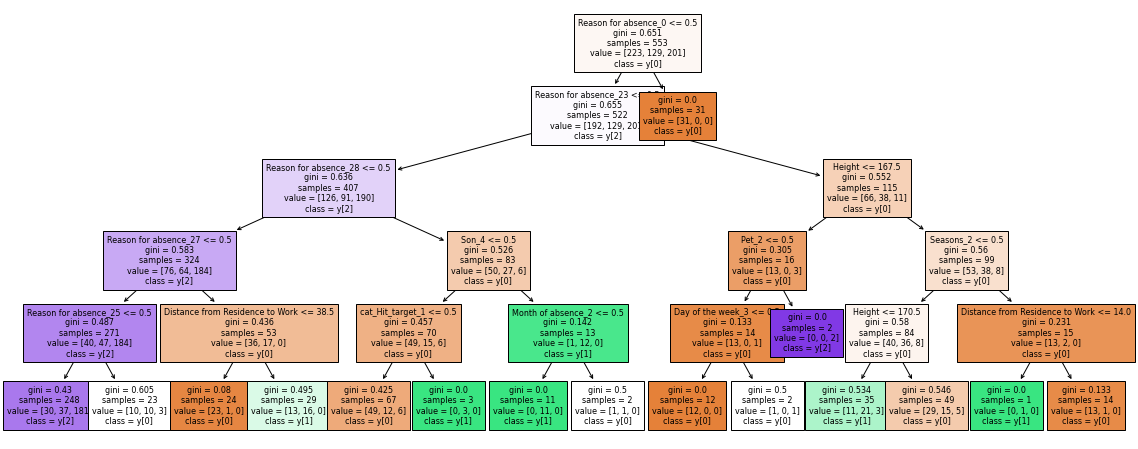

In [166]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
plt.figure(figsize=(20, 8))
tree.plot_tree(arbre_decision_dum, fontsize=8, filled=True,node_ids=False,feature_names=data_dummies2.columns.tolist(),class_names=True)
plt.savefig('tree_high_dpi_dum', dpi=150)
plt.show()


**La matrice de confusion**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


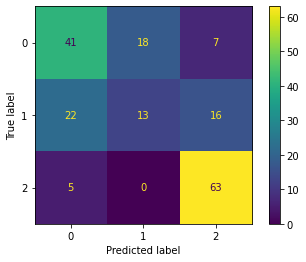

In [167]:
plot_confusion_matrix(arbre_decision_dum, X_dummies2_test, y_dummies2_test, values_format='d')

**Le rapport de performance**

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_dummies2_test, y_pred_dum))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61        66
           1       0.42      0.25      0.32        51
           2       0.73      0.93      0.82        68

    accuracy                           0.63       185
   macro avg       0.58      0.60      0.58       185
weighted avg       0.60      0.63      0.61       185



***Feature selection by forward***

In [169]:
arbre_decision_dums = DecisionTreeClassifier(max_depth=5,random_state=0,criterion="gini")
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfsad = SFS(arbre_decision_dums, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           cv=2)

sfsad = sfsad.fit(data_dummies2, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.3s finished

[2022-03-25 05:57:59] Features: 1/85 -- score: 0.46747967479674796[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.4s finished

[2022-03-25 05:58:00] Features: 2/85 -- score: 0.5392953929539295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    0.4s finished

[2022-03-25 05:58:00] Features: 3/85 -- score: 0.6016260162601625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

**Graphique**

best combination (Score: 0.698): (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 36, 37, 38, 39, 44, 47, 61)

all subsets:
 {1: {'feature_idx': (25,), 'cv_scores': array([0.50135501, 0.43360434]), 'avg_score': 0.46747967479674796, 'feature_names': ('Reason for absence_23',)}, 2: {'feature_idx': (25, 30), 'cv_scores': array([0.58536585, 0.49322493]), 'avg_score': 0.5392953929539295, 'feature_names': ('Reason for absence_23', 'Reason for absence_28')}, 3: {'feature_idx': (25, 29, 30), 'cv_scores': array([0.62601626, 0.57723577]), 'avg_score': 0.6016260162601625, 'feature_names': ('Reason for absence_23', 'Reason for absence_27', 'Reason for absence_28')}, 4: {'feature_idx': (4, 25, 29, 30), 'cv_scores': array([0.69918699, 0.62059621]), 'avg_score': 0.6598915989159893, 'feature_names': ('Reason for absence_0', 'Reason for absence_23', 'Reason for absence_27', 'Reason for absence_28')}, 5: {'feature_idx': (4, 25, 29, 30, 61), '

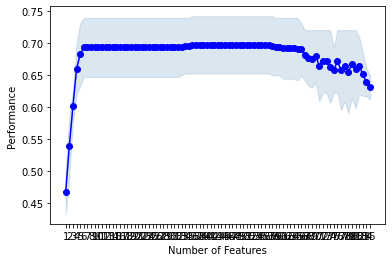

In [170]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
print('best combination (Score: %.3f): %s\n' % (sfsad.k_score_, sfsad.k_feature_idx_))
print('all subsets:\n', sfsad.subsets_)
fig1 =plot_sfs(sfsad.get_metric_dict(), kind='std_err')

**Recupération de la liste**

In [171]:
lad=list(sfsad.k_feature_idx_)

In [172]:
selected_x_fw_ad=data_dummies2.columns[lad]
selected_x_fw_ad

Index(['Reason for absence_0', 'Reason for absence_1', 'Reason for absence_2',
       'Reason for absence_3', 'Reason for absence_4', 'Reason for absence_5',
       'Reason for absence_6', 'Reason for absence_7', 'Reason for absence_8',
       'Reason for absence_9', 'Reason for absence_10',
       'Reason for absence_11', 'Reason for absence_12',
       'Reason for absence_13', 'Reason for absence_14',
       'Reason for absence_16', 'Reason for absence_17',
       'Reason for absence_18', 'Reason for absence_19',
       'Reason for absence_21', 'Reason for absence_22',
       'Reason for absence_23', 'Reason for absence_24',
       'Reason for absence_25', 'Reason for absence_26',
       'Reason for absence_27', 'Reason for absence_28', 'Month of absence_0',
       'Month of absence_3', 'Month of absence_5', 'Month of absence_6',
       'Month of absence_7', 'Month of absence_8', 'Day of the week_2',
       'Day of the week_5', 'Son_4'],
      dtype='object')

**Réestimation**

**La Base**

In [173]:
data_dummies2_fw_ad=data_dummies2[selected_x_fw_ad]


**Train-Test**

In [174]:
X_dummies2_fw_ad_train, X_dummies2_fw_ad_test, y_dummies2_fw_ad_train, y_dummies2_fw_ad_test = train_test_split(data_dummies2_fw_ad, y, shuffle = True)


In [175]:


arbre_decision_dum_fw = DecisionTreeClassifier(max_depth=5,random_state=0,criterion="gini")
arbre_decision_dum_fw.fit(X_dummies2_fw_ad_train,y_dummies2_fw_ad_train)
y_pred_dum = arbre_decision_dum_fw.predict(X_dummies2_fw_ad_test)

print(f"Testing accuracy: {round(accuracy_score(y_pred_dum, y_dummies2_fw_ad_test),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(arbre_decision_dum_fw, data_dummies2_fw_ad, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(arbre_decision_dum_fw, data_dummies2_fw_ad, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 72.97%
Average testing accuracy 5-fold: 69.5%
Average testing accuracy 10-fold: 68.96%


**ARBRE DE DECISION RETENU**

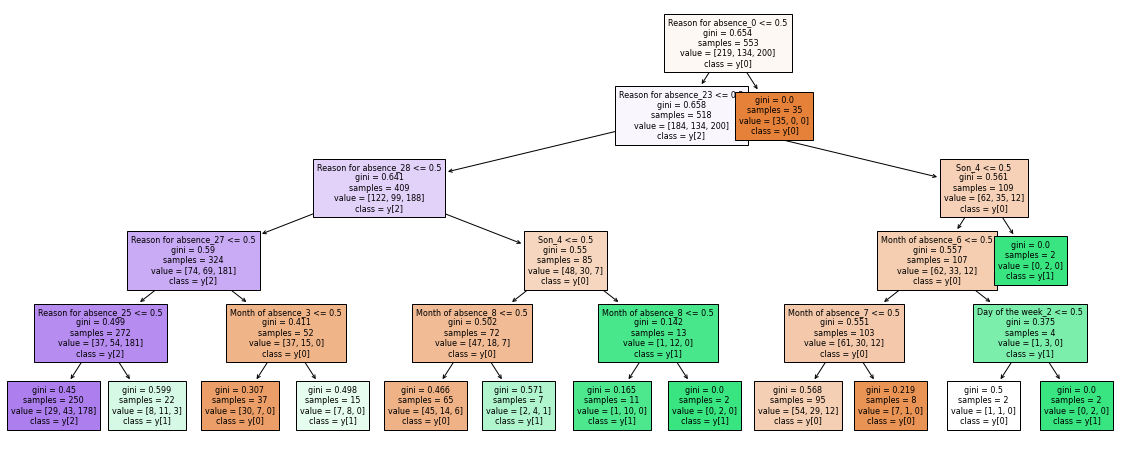

In [176]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
plt.figure(figsize=(20, 8))
tree.plot_tree(arbre_decision_dum_fw, fontsize=8, filled=True,node_ids=False,
               feature_names=data_dummies2_fw_ad.columns.tolist(),class_names=True)
plt.savefig('tree_high_dpi_fw', dpi=150)
plt.show()

**La matrice de confusion**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


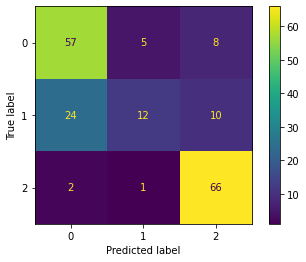

In [177]:
plot_confusion_matrix(arbre_decision_dum_fw, X_dummies2_fw_ad_test, y_dummies2_fw_ad_test, values_format='d')

**Le rapport de performance**

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_dummies2_fw_ad_test, y_pred_dum))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        70
           1       0.67      0.26      0.38        46
           2       0.79      0.96      0.86        69

    accuracy                           0.73       185
   macro avg       0.71      0.68      0.66       185
weighted avg       0.72      0.73      0.70       185



#**CONCLUSION Arbre de décision**

* Globalement, l'arbre de décision permet d'obtenir une performance supérieure à celle obtenue avec les KNN

* Au niveau des arbres, le dernier modèle (via forward selection) est le meilleur en termes de performance.
* La classe 1 a un taux de précision et un taux de sensibilité (recall) faible: les absences de 4 à 8 heures sont difficiles à prédire. 
 - Le modèle permet néanmoins de réaliser une prédiction avec une précision de plus de 50% pour cette classe. 
 - En plus, 1/3 des absences appartenant réellement à cette classe sont effectivement classées dans cette classe avec cet arbre de décision
* La raison d'absence 0 est la racine de l'arbre de décision. Par exemple, le modèle prédit que lorsque la raison d'abscence est 0 alors l'absence est de courte durée (classe 0). Sinon, la raison d'absence n'est pas le 23 (consultation médicale) et n'est pas le 28 (consultation dentaire) et n'est pas 27 (physiothérapie)  et n'est pas le 25 (laboratory examination ) alors l'absence est plus probable d'être de longue durée (plus d'une journée).

* Cet arbre de décision a l'avantage d'être pratique mais a la limite d'être instable en fonction des données. ***Pour avoir une plus grande stabilité dans les prédictions, nous proposons une autre approche afin de comparer***.




# **RANDOM FOREST**

In [179]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score,  plot_confusion_matrix

In [180]:
from scipy import stats

Data

In [181]:
data_dumies2_selected_feas=data_dummies2[feature_selection_df_sel]

**Normalisation**

In [182]:
data_dummies2_std=stats.zscore(data_dumies2_selected_feas[data_dumies2_selected_feas.columns])

**Selection**

**TRAIN, TEST**

In [183]:
X_dummies2_selected2_train, X_dummies2_selected2_test, y_dummies2_selected2_train, y_dummies2_selected2_test = train_test_split(data_dummies2_std, y, shuffle = True)


In [184]:

rf_dum = RandomForestClassifier(max_depth=5,random_state=0,n_estimators = 50, criterion="gini",bootstrap=True)
rf_dum.fit(X_dummies2_selected2_train ,y_dummies2_selected2_train)
y_pred_dum = rf_dum.predict(X_dummies2_selected2_test)

#X_dummies2_selected2_train, X_dummies2_selected2_test, y_dummies2_selected2_train, y_dummies2_selected2_test = train_test_split(data_dummies2_std, y, shuffle = True)
print(f"Testing accuracy: {round(accuracy_score(y_pred_dum, y_dummies2_selected2_test),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(rf_dum, data_dumies2_selected_feas, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(rf_dum, data_dumies2_selected_feas, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 70.27%
Average testing accuracy 5-fold: 67.33%
Average testing accuracy 10-fold: 67.33%


Nous avons essayé max_dephth de 2 à 10. 

La valeur permettant d'avoir la plus grande performance du modèle est 5

**Visualisation feature importance**

<BarContainer object of 26 artists>

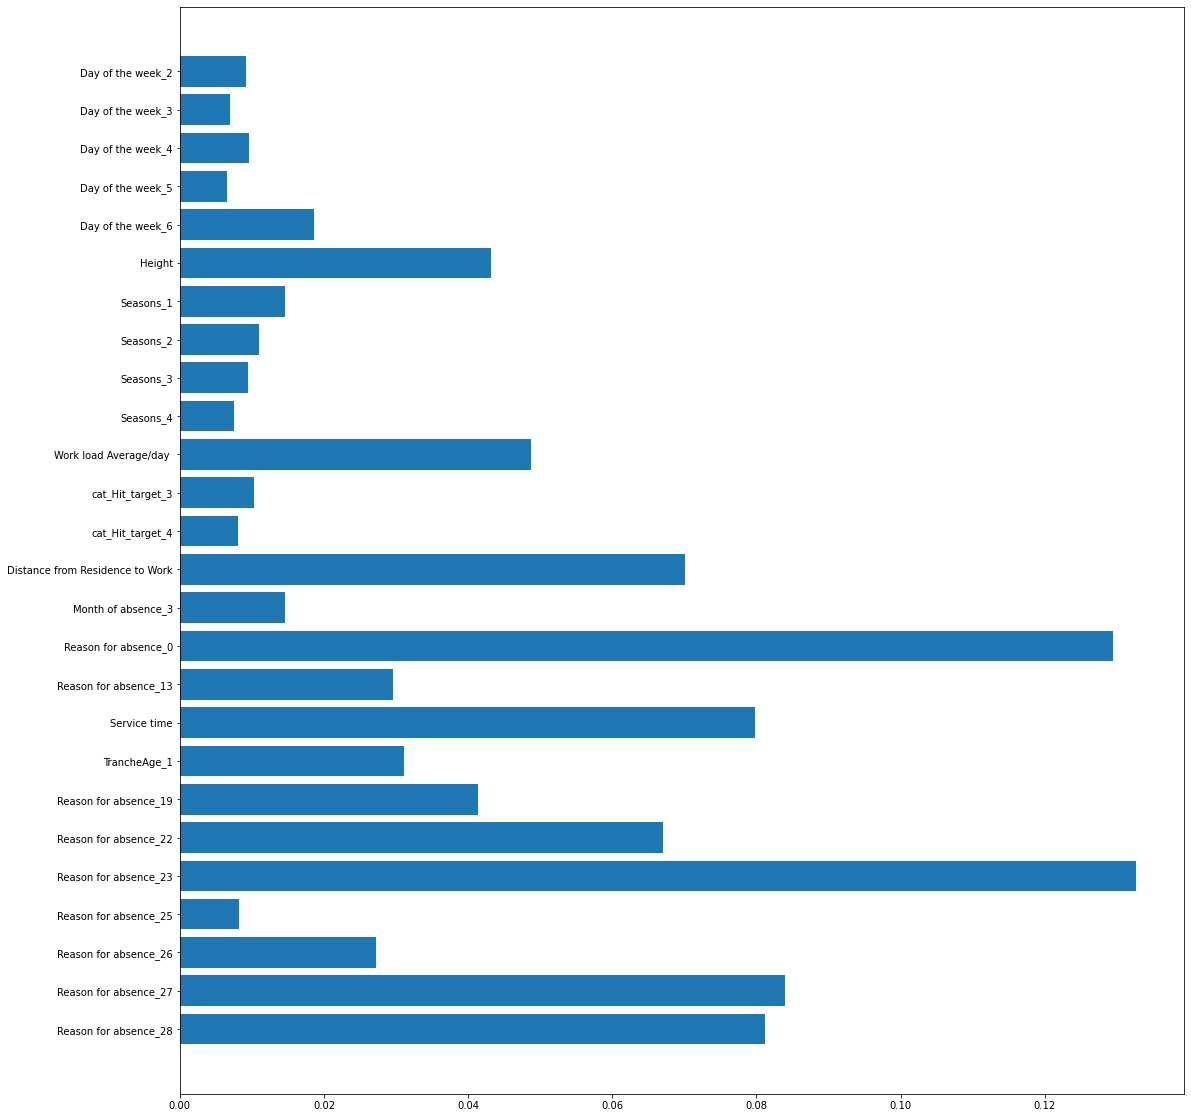

In [185]:
plt.subplots(figsize=(18,20))
plt.barh(data_dumies2_selected_feas.columns, rf_dum.feature_importances_) # Affiche les features importantes dans la prédiction

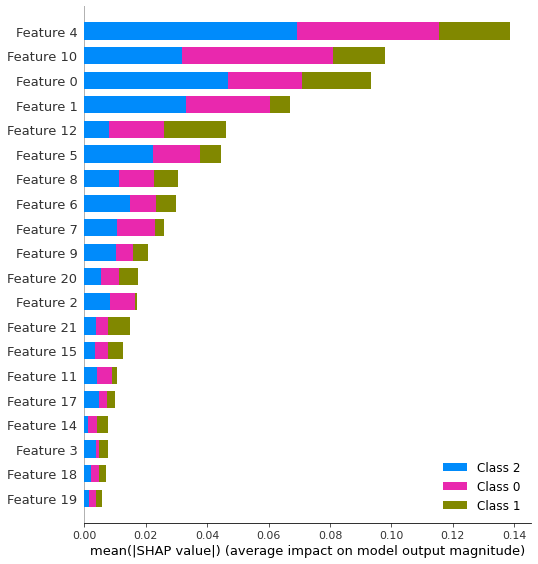

In [186]:
# How the model learnt on test data? What are the key characteristics
explainer_rf_dum = shap.TreeExplainer(rf_dum)
shap_values_rf_dum = explainer_rf_dum.shap_values(X_dummies2_selected2_test)
shap.summary_plot(shap_values_rf_dum, X_dummies2_selected2_test, plot_type="bar")

**La matrice de confusion**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


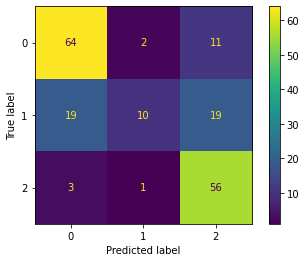

In [187]:
plot_confusion_matrix(rf_dum, X_dummies2_selected2_test, y_dummies2_selected2_test, values_format='d')

**Le rapport de performance**

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_dummies2_selected2_test, y_pred_dum))

              precision    recall  f1-score   support

           0       0.74      0.83      0.79        77
           1       0.77      0.21      0.33        48
           2       0.65      0.93      0.77        60

    accuracy                           0.70       185
   macro avg       0.72      0.66      0.63       185
weighted avg       0.72      0.70      0.66       185



In [189]:
!pip install mlxtend

In [190]:
import joblib

In [191]:
import sys

In [192]:
sys.modules['sklearn.externals.joblib'] = joblib

La Base

In [193]:
X_dummies2_train, X_dummies2_test, y_dummies2_train, y_dummies2_test = train_test_split(data_dummies2_std, y, shuffle = True)


In [194]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import f1_score
rfcl = RandomForestClassifier(n_estimators=15, n_jobs=4, random_state=0)
sfs1 = sfs(rfcl,k_features=(5, 20),  forward=True, verbose=2, scoring='f1_micro', cv=3)
sfs1=sfs1.fit(np.array(X_dummies2_train),y_dummies2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   18.4s finished

[2022-03-25 05:58:45] Features: 1/20 -- score: 0.5099588719153937[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   17.7s finished

[2022-03-25 05:59:03] Features: 2/20 -- score: 0.5425479827653741[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   12.6s finished

[2022-03-25 05:59:15] Features: 3/20 -- score: 0.5877399138268703[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

**Recupération de la liste proposée**

In [195]:
l1=list(sfs1.k_feature_idx_)
l1

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 22, 23, 24]

In [196]:
selected_x_fw=data_dumies2_selected_feas.columns[l1]
selected_x_fw

Index(['Reason for absence_28', 'Reason for absence_27',
       'Reason for absence_26', 'Reason for absence_25',
       'Reason for absence_23', 'Reason for absence_22',
       'Reason for absence_19', 'Service time', 'Reason for absence_13',
       'Reason for absence_0', 'Month of absence_3',
       'Distance from Residence to Work', 'cat_Hit_target_4',
       'cat_Hit_target_3', 'Work load Average/day ', 'Seasons_1', 'Height',
       'Day of the week_5', 'Day of the week_4', 'Day of the week_3'],
      dtype='object')

Visualistation

In [197]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

best combination (f1_score: 0.705): (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 22, 23, 24)

all subsets:
 {1: {'feature_idx': (12,), 'cv_scores': array([0.5027027 , 0.50543478, 0.52173913]), 'avg_score': 0.5099588719153937, 'feature_names': ('12',)}, 2: {'feature_idx': (4, 12), 'cv_scores': array([0.51351351, 0.55978261, 0.55434783]), 'avg_score': 0.5425479827653741, 'feature_names': ('4', '12')}, 3: {'feature_idx': (0, 4, 12), 'cv_scores': array([0.56756757, 0.58695652, 0.60869565]), 'avg_score': 0.5877399138268703, 'feature_names': ('0', '4', '12')}, 4: {'feature_idx': (0, 4, 10, 12), 'cv_scores': array([0.63243243, 0.64130435, 0.6576087 ]), 'avg_score': 0.6437818253035644, 'feature_names': ('0', '4', '10', '12')}, 5: {'feature_idx': (0, 4, 10, 12, 13), 'cv_scores': array([0.66486486, 0.68478261, 0.66847826]), 'avg_score': 0.6727085781433608, 'feature_names': ('0', '4', '10', '12', '13')}, 6: {'feature_idx': (0, 1, 4, 10, 12, 13), 'cv_scores': array([0.68648649, 0.71

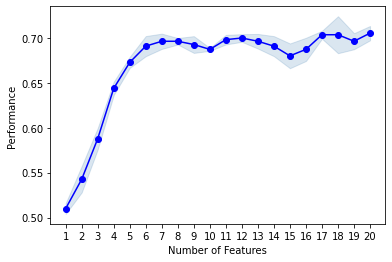

In [198]:
print('best combination (f1_score: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');

In [199]:
#from mlxtend.feature_selection import ExhaustiveFeatureSelector
#from sklearn.ensemble import RandomForestClassifier
#efs= ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=5, max_features=27, scoring='f1_micro', cv=2)
#efs=efs.fit(data_dummies2,y)
#selected_efs=data_dummies2.columns[list(efs.best_idx_)]
#print(selected_efs)

**ESTIMATION AVEC LA LISTE FORWARD**

***Base de données***

In [200]:
data_dumies2_selected_fea_fw=data_dummies2[selected_x_fw]

**Normalisation**

In [201]:
data_dumies2_selected_fea_fw_std=stats.zscore(data_dumies2_selected_fea_fw[data_dumies2_selected_fea_fw.columns])

**Train-test data**

In [202]:
X_dummies2_selected_fw_train, X_dummies2_selected_fw_test, y_dummies2_selected_fw_train, y_dummies2_selected_fw_test = train_test_split(data_dumies2_selected_fea_fw_std, y, shuffle = True)


**Estimation**

In [203]:

rf_dum_fw = RandomForestClassifier(max_depth=4,random_state=0,n_estimators = 50, criterion="gini",bootstrap=True)
rf_dum_fw.fit(X_dummies2_selected_fw_train ,y_dummies2_selected_fw_train)
y_pred_dum = rf_dum_fw.predict(X_dummies2_selected_fw_test)

print(f"Testing accuracy: {round(accuracy_score(y_pred_dum, y_dummies2_selected_fw_test),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(rf_dum_fw, data_dumies2_selected_fea_fw_std, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(rf_dum_fw, data_dumies2_selected_fea_fw_std, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 70.27%
Average testing accuracy 5-fold: 68.55%
Average testing accuracy 10-fold: 68.01%


Nous avons essayer max_dephth de 2 à 10.

La valeur permettant d'avoir la plus grande performance du modèle est 5

**La Matrice de confusion**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


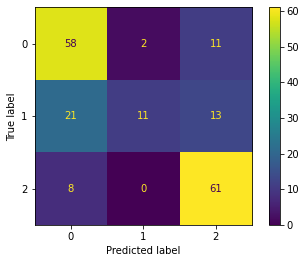

In [204]:
plot_confusion_matrix(rf_dum_fw, X_dummies2_selected_fw_test, y_dummies2_selected_fw_test, values_format='d')

**Le rapport de performance**

In [205]:
print(classification_report(y_dummies2_selected_fw_test, y_pred_dum))

              precision    recall  f1-score   support

           0       0.67      0.82      0.73        71
           1       0.85      0.24      0.38        45
           2       0.72      0.88      0.79        69

    accuracy                           0.70       185
   macro avg       0.74      0.65      0.64       185
weighted avg       0.73      0.70      0.67       185



# **CONCLUSION Random Forest**

Le modèle proposé permet de mieux prévoir les absences de courte durée et de long durée. La prévision des absences de moyenne durée est très mauvaise: ces absences se confondent aux absences de courte durée ou de long durée.
- près de 90% des absences appartenenant effectivement à la classe 2 (troisième classe) sont bien classées dans cette classe près de contre 82% de ceux de la classe 0 (première classe) et seulement environ 25% de la classe 1 (deuxième classe). Cependant, la précision du classement de cette classe (classe 1) est très élevé: c'est à dire que presque toutes les absences classées dans cette classe appartiennent effectivement à cette classe. Dans les autres classes, la présicision est d'environ 2  sur 3 classées ou 3 sur 4 classées.

- Néanmoins, les variables suggérées par la selection suivant la technique forward donnent la meilleure performance par rapport à la liste suggérérée par les autres techniques de selection

* **Selon l'objectif de l'entreprise, une alternative est de fondre cette classe pour avoir deux classes  afin d'améliorer les prédictions en attendant de trouver une caractéristique permettant d'améliorer la performance de ce modèle**

* **Au niveau technique, l'implémentation d'un autre modèle d'estimation pourrait être mieux indiqué**. Nous propsons une analyse suivant une autre méthode

# Boosting

Principe et valeur ajoutée: ***réduire les erreurs de prédiction et se rapprocher de la réalité***

**Les données**

In [206]:
X_dummies2_train, X_dummies2_test, y_dummies2_train, y_dummies2_test = train_test_split(data_dummies2, y, shuffle = True)


**Features selection**
Methode forward

In [207]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
bocl = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
sfsbo = sfs(bocl,k_features=(5, 25),  forward=True, verbose=2, scoring='f1_micro', cv=3)
sfsbo=sfsbo.fit(np.array(X_dummies2_train),y_dummies2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:  1.1min finished

[2022-03-25 06:02:28] Features: 1/25 -- score: 0.49009988249118686[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   56.2s finished

[2022-03-25 06:03:24] Features: 2/25 -- score: 0.5388464551508031[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   58.2s finished

[2022-03-25 06:04:23] Features: 3/25 -- score: 0.5551899725812769[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

**visualisation**

In [208]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

best combination (f1_score: 0.703): (0, 4, 6, 7, 10, 11, 13, 18, 25, 27, 29, 30, 31, 33, 58, 69, 71, 72, 73, 77, 78, 80, 81, 83)

all subsets:
 {1: {'feature_idx': (0,), 'cv_scores': array([0.46486486, 0.49456522, 0.51086957]), 'avg_score': 0.49009988249118686, 'feature_names': ('0',)}, 2: {'feature_idx': (0, 30), 'cv_scores': array([0.55675676, 0.55434783, 0.50543478]), 'avg_score': 0.5388464551508031, 'feature_names': ('0', '30')}, 3: {'feature_idx': (0, 4, 30), 'cv_scores': array([0.53513514, 0.58695652, 0.54347826]), 'avg_score': 0.5551899725812769, 'feature_names': ('0', '4', '30')}, 4: {'feature_idx': (0, 4, 25, 30), 'cv_scores': array([0.61081081, 0.57065217, 0.5923913 ]), 'avg_score': 0.5912847630238934, 'feature_names': ('0', '4', '25', '30')}, 5: {'feature_idx': (0, 4, 25, 29, 30), 'cv_scores': array([0.68108108, 0.64130435, 0.64130435]), 'avg_score': 0.654563258911085, 'feature_names': ('0', '4', '25', '29', '30')}, 6: {'feature_idx': (0, 4, 25, 29, 30, 71), 'cv_scores': arr

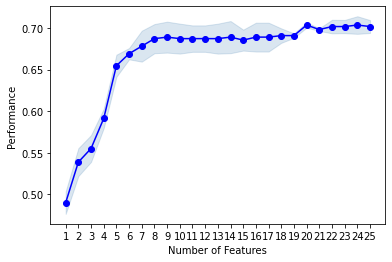

In [209]:
print('best combination (f1_score: %.3f): %s\n' % (sfsbo.k_score_, sfsbo.k_feature_idx_))
print('all subsets:\n', sfsbo.subsets_)
plot_sfs(sfsbo.get_metric_dict(), kind='std_err');

**Recupération de la liste proposée**

In [210]:
lbo=list(sfsbo.k_feature_idx_)
lbo

[0,
 4,
 6,
 7,
 10,
 11,
 13,
 18,
 25,
 27,
 29,
 30,
 31,
 33,
 58,
 69,
 71,
 72,
 73,
 77,
 78,
 80,
 81,
 83]

In [211]:
selected_x_fw=data_dummies2.columns[lbo]
selected_x_fw

Index(['Distance from Residence to Work', 'Reason for absence_0',
       'Reason for absence_2', 'Reason for absence_3', 'Reason for absence_6',
       'Reason for absence_7', 'Reason for absence_9', 'Reason for absence_14',
       'Reason for absence_23', 'Reason for absence_25',
       'Reason for absence_27', 'Reason for absence_28', 'Month of absence_0',
       'Month of absence_2', 'Son_1', 'Pet_8', 'TrancheAge_1', 'TrancheAge_2',
       'TrancheAge_3', 'cat_Hit_target_4', 'cat_Transportation_expense_1',
       'cat_Transportation_expense_3', 'cat_Transportation_expense_4',
       'cat_Body_mass_index_3'],
      dtype='object')

**La Base**

In [212]:
data_dumies2_selected_fea_fw=data_dummies2[selected_x_fw]

**Estimation avec la liste selectionnée**

In [213]:
X_dummies2_selected_fw_train, X_dummies2_selected_fw_test, y_dummies2_selected_fw_train, y_dummies2_selected_fw_test = train_test_split(data_dumies2_selected_fea_fw, y, shuffle = True)


In [214]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=700, learning_rate=.05,  max_depth=3, random_state=0)
clf.fit(X_dummies2_selected_fw_train, y_dummies2_selected_fw_train)

y_predum = clf.predict(X_dummies2_selected_fw_test)

print(f"Testing accuracy: {round(accuracy_score(y_predum, y_dummies2_selected_fw_test),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(clf, data_dumies2_selected_fea_fw, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(clf, data_dumies2_selected_fea_fw, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 66.49000000000001%
Average testing accuracy 5-fold: 61.64%
Average testing accuracy 10-fold: 59.34%


***Feature importance***

<BarContainer object of 24 artists>

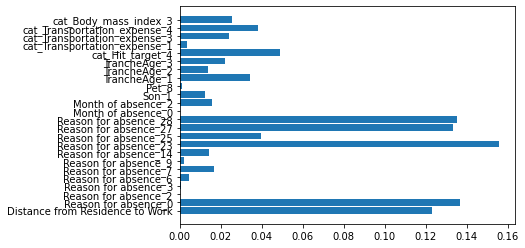

In [215]:
plt.barh(data_dumies2_selected_fea_fw.columns, clf.feature_importances_)

**La matrice de confusion**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


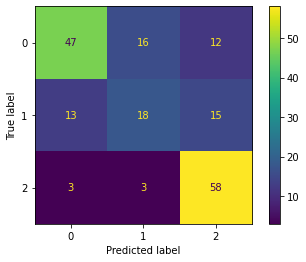

In [216]:
plot_confusion_matrix(clf, X_dummies2_selected_fw_test, y_dummies2_selected_fw_test, values_format='d')

**Le rapport de performance**

In [217]:
print(classification_report(y_dummies2_selected_fw_test, y_predum))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68        75
           1       0.49      0.39      0.43        46
           2       0.68      0.91      0.78        64

    accuracy                           0.66       185
   macro avg       0.64      0.64      0.63       185
weighted avg       0.66      0.66      0.65       185



# **Conclusion Boosting**

Comme avec le random forest, le modèle proposé avec l'algorithme du Boosting permet de mieux prévoir les absences de courte durée et de long durée. La prévision des absences de moyenne durée est moyenne: ces absences se confondent aux absences de courte durée ou de long durée.
- 89% des individus appartenenant effectivement à la classe 2 sont bien classés dans cette classe, contre 77% de ceux de la classe 0 et  44% de la classe 1. Cependant, la précision du classement de cette classe (classe 1) est moyenne (50%): c'est à dire que la moitié des individus classés dans cette classe appartiennent effectivement à cette classe. Dans les autres classes, la précision est entre 75 et 84%.

-Ce modèle améliore la performance globale par rapport au random forest. En plus, il améliore la précision pour les classes 0 et 2. La précision de la classe 1 a baissé mais le taux des individus appartenant effectivement à cette et ayant été bien classés dans cette classe augmente remarquablement pour passer à 44%. 

* Les caractéristiques de cette classe (1) sont difficiles à distinguer de celles des autres avec les informations que nous disposons et avec les algoritmes utilisées.

* Néanmoins, le modèle proposé permet de classer avec un taux de précision de près de 75% soit 3 cas sur 4.

* **Selon l'objectif de l'entreprise, une alternative est de fondre cette classe pour avoir deux classes  afin d'améliorer les prédictions en attendant de trouver une caractéristique permettant d'améliorer la performance de ce modèle**



# **Support Vector Machines Classification**

Principe: proposer une classification capable de distinguer des classes y compris celles apparemment non séparable 

**Avec la base préselectionnée**


**La Base**

In [218]:
#df_dum_feature_selection_df_sel=data_dummies2[feature_selection_df_sel]

**Train-Test**

In [219]:
#X_feature_selection_df_sel_train, X_feature_selection_df_sel_test, y_feature_selection_df_sel_train, y_feature_selection_df_sel_test = train_test_split(df_dum_feature_selection_df_sel, y, shuffle = True)


**Estimation**

In [220]:
# Fit du  Training set
from sklearn.svm import SVC
classifier_psel = SVC(kernel ='poly', random_state = 0)
classifier_psel.fit(X_feature_selection_df_sel_train, y_feature_selection_df_sel_train)
#Prediction sur le Test set
y_pred = classifier_psel.predict(X_feature_selection_df_sel_test)


print(f"Testing accuracy: {round(accuracy_score(y_pred, y_feature_selection_df_sel_test),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(classifier_psel, df_dum_feature_selection_df_sel, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(classifier_psel, df_dum_feature_selection_df_sel, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 43.78%
Average testing accuracy 5-fold: 39.02%
Average testing accuracy 10-fold: 39.84%


**La matrice confusion**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


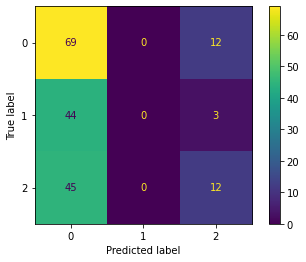

In [221]:
plot_confusion_matrix(classifier_psel, X_feature_selection_df_sel_test, y_feature_selection_df_sel_test, values_format='d')

**Le rapport de performance**

In [222]:
print(classification_report(y_feature_selection_df_sel_test, y_pred))

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

           0       0.44      0.85      0.58        81
           1       0.00      0.00      0.00        47
           2       0.44      0.21      0.29        57

    accuracy                           0.44       185
   macro avg       0.29      0.35      0.29       185
weighted avg       0.33      0.44      0.34       185



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


**Avec la Base de données Globale**

In [223]:
X_dummies2_train_sv, X_dummies2_test_sv, y_dummies2_train_sv, y_dummies2_test_sv = train_test_split(data_dummies2, y, shuffle = True)


**Estimation**

In [224]:
# Fit du  Training set
from sklearn.svm import SVC
classifier_bg = SVC(kernel = 'poly', random_state = 0, decision_function_shape="ovo")
classifier_bg.fit(X_dummies2_train_sv, y_dummies2_train_sv)
#Prediction sur le Test set
y_pred = classifier_bg.predict(X_dummies2_test_sv)


print(f"Testing accuracy: {round(accuracy_score(y_pred, y_dummies2_test_sv),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(classifier_bg, data_dummies2, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(classifier_bg, data_dummies2, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 36.22%
Average testing accuracy 5-fold: 39.29%
Average testing accuracy 10-fold: 39.84%


**La matrice de confusion**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


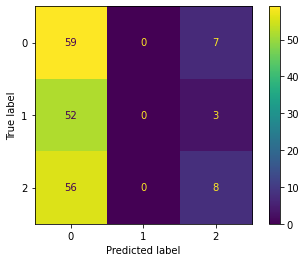

In [225]:
plot_confusion_matrix(classifier_bg, X_dummies2_test_sv, y_dummies2_test_sv, values_format='d')

**Le rapport de performance**

In [226]:
print(classification_report(y_dummies2_test_sv, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.89      0.51        66
           1       0.00      0.00      0.00        55
           2       0.44      0.12      0.20        64

    accuracy                           0.36       185
   macro avg       0.27      0.34      0.23       185
weighted avg       0.28      0.36      0.25       185



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


**Selection de feature avec la méthode forward**

**Les données**

In [227]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import f1_score
from sklearn.svm import SVC
#from sklearn.ensemble import SVM
svccl = SVC(kernel = 'poly', random_state = 0, decision_function_shape="ovo")
sfssvc = sfs(svccl,k_features=(5, 25),  forward=True, verbose=2, scoring='f1_micro', cv=3)
sfssvc=sfssvc.fit(np.array(X_dummies2_train_sv),y_dummies2_train_sv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   52.8s finished

[2022-03-25 06:25:54] Features: 1/25 -- score: 0.4791421856639248[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    2.0s finished

[2022-03-25 06:25:56] Features: 2/25 -- score: 0.5478946337641989[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    1.8s finished

[2022-03-25 06:25:58] Features: 3/25 -- score: 0.6148061104582844[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

**

best combination (f1_score: 0.723): (4, 5, 6, 7, 8, 11, 23, 25, 27, 29, 30, 57, 61)

all subsets:
 {1: {'feature_idx': (25,), 'cv_scores': array([0.51351351, 0.47282609, 0.45108696]), 'avg_score': 0.4791421856639248, 'feature_names': ('25',)}, 2: {'feature_idx': (25, 30), 'cv_scores': array([0.56216216, 0.51630435, 0.56521739]), 'avg_score': 0.5478946337641989, 'feature_names': ('25', '30')}, 3: {'feature_idx': (25, 29, 30), 'cv_scores': array([0.62702703, 0.59782609, 0.61956522]), 'avg_score': 0.6148061104582844, 'feature_names': ('25', '29', '30')}, 4: {'feature_idx': (4, 25, 29, 30), 'cv_scores': array([0.67567568, 0.65217391, 0.69021739]), 'avg_score': 0.6726889933411672, 'feature_names': ('4', '25', '29', '30')}, 5: {'feature_idx': (4, 25, 29, 30, 61), 'cv_scores': array([0.69189189, 0.68478261, 0.70652174]), 'avg_score': 0.6943987465726597, 'feature_names': ('4', '25', '29', '30', '61')}, 6: {'feature_idx': (4, 25, 27, 29, 30, 61), 'cv_scores': array([0.69189189, 0.69565217, 0.71

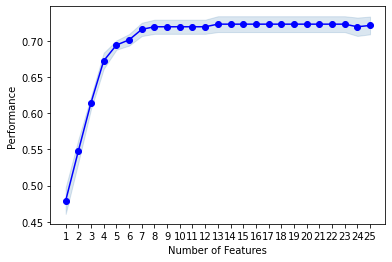

In [228]:
print('best combination (f1_score: %.3f): %s\n' % (sfssvc.k_score_, sfssvc.k_feature_idx_))
print('all subsets:\n', sfssvc.subsets_)
plot_sfs(sfssvc.get_metric_dict(), kind='std_err');

**Récupération de la liste**

In [229]:
lsvc=list(sfssvc.k_feature_idx_)
lsvc

[4, 5, 6, 7, 8, 11, 23, 25, 27, 29, 30, 57, 61]

**La Base**

In [230]:
selected_x_fw_sv=data_dummies2.columns[lsvc]
selected_x_fw_sv

Index(['Reason for absence_0', 'Reason for absence_1', 'Reason for absence_2',
       'Reason for absence_3', 'Reason for absence_4', 'Reason for absence_7',
       'Reason for absence_21', 'Reason for absence_23',
       'Reason for absence_25', 'Reason for absence_27',
       'Reason for absence_28', 'Son_0', 'Son_4'],
      dtype='object')

In [231]:
data_dumies2_selected_fea_fw_sv=data_dummies2[selected_x_fw_sv]

**Train-Test**

In [232]:
X_dummies2_selected_fw_train_sv, X_dummies2_selected_fw_test_sv, y_dummies2_selected_fw_train_sv, y_dummies2_selected_fw_test_sv = train_test_split(data_dumies2_selected_fea_fw_sv, y, shuffle = True)


**Réestimation avec la liste sélectionnée**

In [233]:
# Fit du  Training set
from sklearn.svm import SVC
classifier_fw = SVC(kernel = 'poly', random_state = 0, decision_function_shape="ovo")
classifier_fw.fit(X_dummies2_selected_fw_train_sv, y_dummies2_selected_fw_train_sv)
#Prediction sur le Test set
y_pred = classifier_fw.predict(X_dummies2_selected_fw_test_sv)


print(f"Testing accuracy: {round(accuracy_score(y_pred, y_dummies2_selected_fw_test_sv),4)*100}%")
print(f"Average testing accuracy 5-fold: {round(cross_validate(classifier_fw, data_dumies2_selected_fea_fw_sv, y, cv=5)['test_score'].mean()*100,2)}%")
print(f"Average testing accuracy 10-fold: {round(cross_validate(classifier_fw, data_dumies2_selected_fea_fw_sv, y, cv=10)['test_score'].mean()*100,2)}%")

Testing accuracy: 73.50999999999999%
Average testing accuracy 5-fold: 69.23%
Average testing accuracy 10-fold: 69.23%


**La matrice de confusion**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


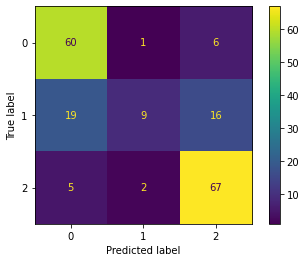

In [234]:
plot_confusion_matrix(classifier_fw, X_dummies2_selected_fw_test_sv, y_dummies2_selected_fw_test_sv, values_format='d')

**Le rapport de performance**

In [235]:
print(classification_report(y_dummies2_selected_fw_test_sv, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        67
           1       0.75      0.20      0.32        44
           2       0.75      0.91      0.82        74

    accuracy                           0.74       185
   macro avg       0.74      0.67      0.65       185
weighted avg       0.74      0.74      0.69       185



# **CONCLUSION SVM**

*  Trois niveaux de sélection des variables
* La liste obtenue avec la sélection forward est celle qui permet d'avoir la meilleure performance. Environ 70% de précision globale. La classification de la classe 1 est ici meilleure par rapport à celle avec tous les autres modèles. Elle reste cependant moins précise que la classification des autres classes.

# CONCLUSION GENERALE:

Pour cet objectif,
* Un simple arbre de décision sur la liste des variables péselectionnées permet d'avoir des prédictions précises à près de 75%
* L'autre modèle qui permet d'avoir un résultat proche est le SVM: il semble proposer le meilleur modèle de prédiction avec une forte stabilité.
